## Referensi
- https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/notebook
- https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f

## Business Problem

- memprediksi credit risk -> kemungkinan gagal bayar atau tidak pada saat mengajukan pinjaman

- issue_d, loan_status, pymnt_plan, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d: Ini semua berkaitan dengan riwayat pembayaran pinjaman. Sebenarnya variabel-variabel yang Anda sebutkan umumnya tidak dibutuhkan saat mengajukan pinjaman. Sebaliknya, ini adalah informasi yang biasanya dipantau dan dikumpulkan oleh pemberi pinjaman setelah pinjaman disetujui dan diterima oleh peminjam

- Jadi, pada saat mengajukan pinjaman, pemberi pinjaman biasanya lebih tertarik pada riwayat kredit dan kemampuan peminjam untuk membayar kembali pinjaman, bukan detail pinjaman saat ini yang baru akan ada setelah pinjaman diterbitkan.

## Varaibel yang dibutuhkan
- variabel yang dilakukan saat mengajukan pinjaman, karena untuk mengetahui apakah si peminjam akan gagal bayar atau tidak

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import hvplot.pandas
import plotly.express as px
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_columns', None)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3604/4277137087.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [5]:
df_num = df.select_dtypes("number").columns.to_list()
len(df_num)

52

In [6]:
df_cat = df.select_dtypes("object").columns.to_list()
len(df_cat)

22

## Defining Label

In [4]:
df_v2 =df.copy()

In [5]:
df_v2['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Label target dengan nilai 1 dan 0 biasanya digunakan untuk kasus klasifikasi biner dan biasanya disimpan dalam format numerik (integer atau float). Meskipun secara teknis dapat disimpan sebagai string atau objek (misalnya '1' dan '0'), hal ini kurang umum dan bisa menyebabkan masalah saat menggunakan banyak algoritma machine learning, yang umumnya mengharapkan label dalam format numerik.

In [5]:
def label_creation(x):
    if x == 'Default' or x == 'Charged Off' or x == 'Does not meet the credit policy. Status:Charged Off':
        return 1
    else:
        return 0
    
df_v2['label'] = df_v2['loan_status'].apply(label_creation)
df_v2.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00        

In [6]:
df_v2['label'].value_counts()

0    422217
1     44068
Name: label, dtype: int64

In [ ]:
#percent of label
label_count = df_v2.groupby(by=['label']).count()
fig = px.pie(label_count, values='id', names=label_count.index)
fig.show()

## Feature Filtering

fitur yang tidak dibutuhkan/irelevan di buang, karena bisa kemungkinan data leakage

In [7]:
df_v2.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'issue_d', 'loan_status',
           'pymnt_plan', 'url', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 
            'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
           'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], axis=1, inplace=True)

## EDA

<AxesSubplot:title={'center':'Relationship between Interest Rate and Loan Grade'}, xlabel='grade', ylabel='int_rate'>

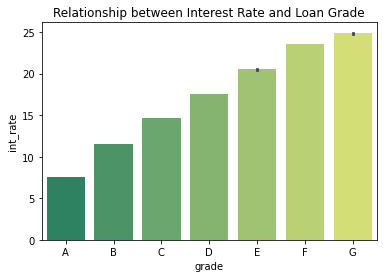

In [8]:
#bar plot Relationship between Interest Rate and Loan Grade
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] # adjust this to your needs
cat_type = CategoricalDtype(categories=grades, ordered=True)
df['grade'] = df['grade'].astype(cat_type)

df_sorted = df.sort_values('grade')

plt.title("Relationship between Interest Rate and Loan Grade")
sns.barplot(x = df_sorted["grade"], y = df_sorted["int_rate"], palette="summer")

<AxesSubplot:title={'center':'Relationship between DTI and Loan Grade'}, xlabel='grade', ylabel='dti'>

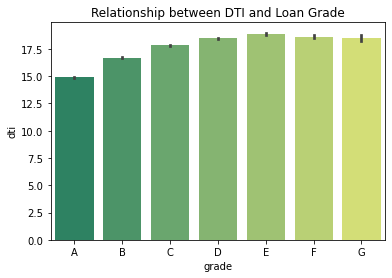

In [9]:
#bar plot 
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] # adjust this to your needs
cat_type = CategoricalDtype(categories=grades, ordered=True)
df['grade'] = df['grade'].astype(cat_type)

df_sorted = df.sort_values('grade')

plt.title("Relationship between DTI and Loan Grade")
sns.barplot(x = df_sorted["grade"], y = df_sorted["dti"], palette="summer")

## Data Cleaning

In [8]:
#drop because there is a sub grade 
df_v2.drop('grade', axis=1, inplace=True)

In [9]:
#change data type from object to datetime
df_v2['earliest_cr_line'] = pd.to_datetime(df_v2['earliest_cr_line'], format='%b-%y')
df_v2['last_credit_pull_d'] = pd.to_datetime(df_v2['last_credit_pull_d'], format='%b-%y')

In [10]:
#change feature. just take from year
df_v2['earliest_cr_line'] = df_v2['earliest_cr_line'].dt.year
df_v2['last_credit_pull_d'] = df_v2['last_credit_pull_d'].dt.year

In [11]:
#check number of unique each of column with data type object
df_cat = df_v2.select_dtypes("object").columns.to_list()
for x in df_cat:
    print(x)
    print(df_v2[x].nunique())

term
2
sub_grade
35
emp_title
205475
emp_length
11
home_ownership
6
verification_status
3
desc
124436
purpose
14
title
63099
zip_code
888
addr_state
50
initial_list_status
2
application_type
1


In [12]:
#drop many uniq and 1 unique value from data type object
df_v2.drop(['emp_title', 'desc', 'title', 'zip_code', 'application_type'], axis=1, inplace=True)
df_v2

loan_amnt        term  int_rate  installment sub_grade emp_length  \
0            5000   36 months     10.65       162.87        B2  10+ years   
1            2500   60 months     15.27        59.83        C4   < 1 year   
2            2400   36 months     15.96        84.33        C5  10+ years   
3           10000   36 months     13.49       339.31        C1  10+ years   
4            3000   60 months     12.69        67.79        B5     1 year   
...           ...         ...       ...          ...       ...        ...   
466280      18400   60 months     14.47       432.64        C2    4 years   
466281      22000   60 months     19.97       582.50        D5  10+ years   
466282      20700   60 months     16.99       514.34        D1    7 years   
466283       2000   36 months      7.90        62.59        A4    3 years   
466284      10000   36 months     19.20       367.58        D3  10+ years   

       home_ownership  annual_inc verification_status             purpose  \
0                RENT     24000.0            Verified         credit_card   
1                RENT     30000.0     Source Verified                 car   
2                RENT     12252.0        Not Verified      small_business   
3                RENT     49200.0     Source Verified               other   
4                RENT     80000.0     Source Verified               other   
...               ...         ...                 ...                 ...   
466280       MORTGAGE    110000.0     Source Verified  debt_consolidation   
466281       MORTGAGE     78000.0            Verified  debt_consolidation   
466282       MORTGAGE     46000.0            Verified  debt_consolidation   
466283            OWN     83000.0            Verified         credit_card   
466284       MORTGAGE     46000.0            Verified               other   

       addr_state    dti  delinq_2yrs  earliest_cr_line  inq_last_6mths  \
0              AZ  27.65          0.0            1985.0             1.0   
1              GA   1.00          0.0            1999.0             5.0   
2              IL   8.72          0.0            2001.0             2.0   
3              CA  20.00          0.0            1996.0             1.0   
4              OR  17.94          0.0            1996.0             0.0   
...           ...    ...          ...               ...             ...   
466280         TX  19.85          0.0            2003.0             2.0   
466281         TN  18.45          0.0            1997.0             5.0   
466282         OH  25.65          0.0            2001.0             2.0   
466283         CA   5.39          3.0            2003.0             1.0   
466284         CA  22.78          1.0            2000.0             0.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                          NaN                     NaN       3.0      0.0   
1                          NaN                     NaN       3.0      0.0   
2                          NaN                     NaN       2.0      0.0   
3                         35.0                     NaN      10.0      0.0   
4                         38.0                     NaN      15.0      0.0   
...                        ...                     ...       ...      ...   
466280                     NaN                     NaN      18.0      0.0   
466281                     NaN                   116.0      18.0      1.0   
466282                    65.0                     NaN      18.0      0.0   
466283                    13.0                     NaN      21.0      0.0   
466284                     9.0                     NaN       6.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  \
0           13648        83.7        9.0                   f   
1            1687         9.4        4.0                   f   
2            2956        98.5       10.0                   f   
3            5598        21.0       37.0                   f   
4           

In [12]:
#check duplicate
df.duplicated().sum()

0

In [13]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   installment                  466285 non-null  float64
 4   grade                        466285 non-null  object 
 5   sub_grade                    466285 non-null  object 
 6   emp_length                   445277 non-null  object 
 7   home_ownership               466285 non-null  object 
 8   annual_inc                   466281 non-null  float64
 9   verification_status          466285 non-null  object 
 10  purpose                      466285 non-null  object 
 11  addr_state                   466285 non-null  object 
 12  dti                          466285 non-null  float64
 13 

In [13]:
#check unique values each of column with data type object
df_cat = df_v2.select_dtypes("object").columns.to_list()
for x in df_cat:
    print(x)
    print(df_v2[x].unique())

term
[' 36 months' ' 60 months']
sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status
['Verified' 'Source Verified' 'Not Verified']
purpose
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
initial_list_status
['f' 'w']


<AxesSubplot:xlabel='count', ylabel='verification_status'>

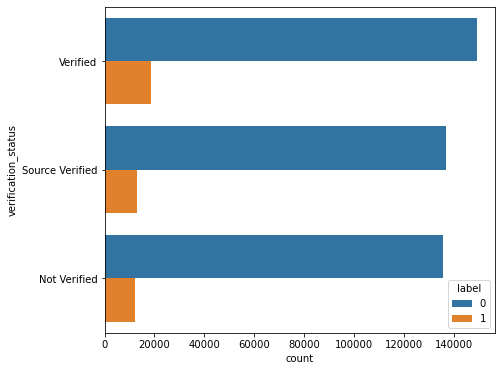

In [16]:
plt.figure(figsize = (7, 6))
sns.countplot(y="verification_status", data=df_v2, hue='label')

<AxesSubplot:xlabel='count', ylabel='emp_length'>

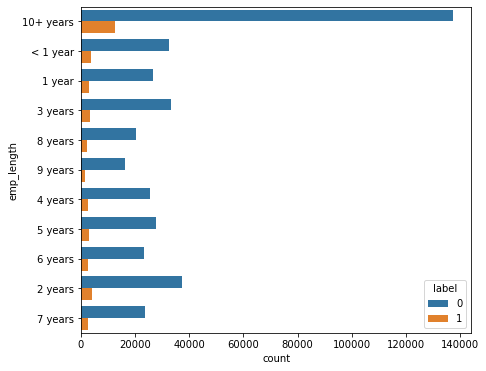

In [16]:
plt.figure(figsize = (7, 6))
sns.countplot(y="emp_length", data=df_v2, hue='label')

In [15]:
df_v2['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='count', ylabel='home_ownership'>

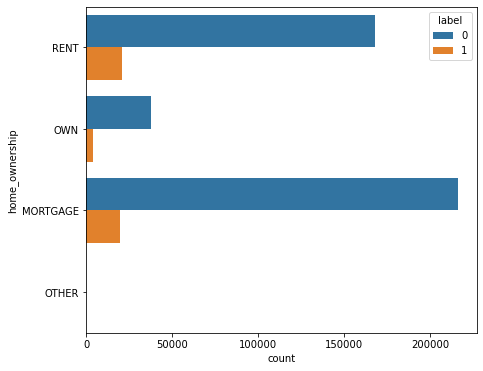

In [17]:
#check home_ownership with label
plt.figure(figsize = (7, 6))
sns.countplot(y="home_ownership", data=df_v2, hue='label')

In [14]:
#replace value any and none from home_ownership to other value
df_v2.loc[(df_v2['home_ownership'] == 'ANY') | (df_v2['home_ownership'] == 'NONE'), 'home_ownership'] = 'OTHER'  
df_v2['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='count', ylabel='term'>

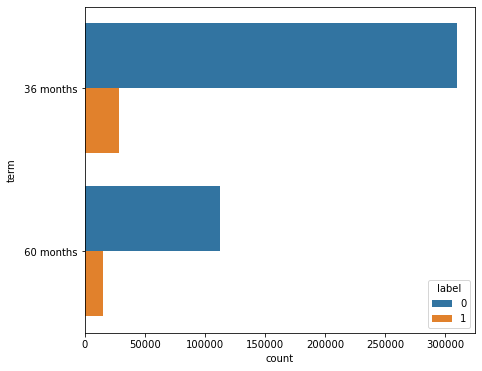

In [37]:
plt.figure(figsize = (7, 6))
sns.countplot(y="term", data=df_v2, hue='label')

In [72]:
int_rate = df_v2.hvplot.hist(
    y='int_rate', by='label', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = df_v2.hvplot.hist(
    y='annual_inc', by='label', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [label]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [label]
      :Histogram   [annual_inc]   (annual_inc_count)

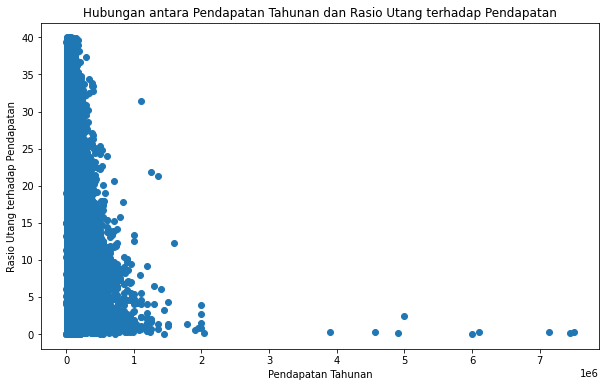

In [26]:
# Plot hubungan antara 'annual_inc' dan 'dti'
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_inc'], df['dti'])
plt.title('Hubungan antara Pendapatan Tahunan dan Rasio Utang terhadap Pendapatan')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Rasio Utang terhadap Pendapatan')
plt.show()

# Data Cleaning

## Missing Values

In [15]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, threshold = 70):
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    #percent for missing values based on threshold
    miss = pd.DataFrame(df.isnull().sum())
    miss['percent'] = 100 * miss[0] / len(df)
        
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
        
    missing_columns = list(miss.index[miss['percent'] > threshold])

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
        
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [16]:
#check missing values
df_mv = missing_values_table(df_v2)
df_mv

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.
There are 19 columns with greater than 70% missing values.


Missing Values  % of Total Values
inq_last_12m                         466285              100.0
open_rv_12m                          466285              100.0
open_il_6m                           466285              100.0
open_acc_6m                          466285              100.0
mths_since_rcnt_il                   466285              100.0
verification_status_joint            466285              100.0
dti_joint                            466285              100.0
annual_inc_joint                     466285              100.0
total_bal_il                         466285              100.0
open_il_24m                          466285              100.0
il_util                              466285              100.0
open_rv_24m                          466285              100.0
max_bal_bc                           466285              100.0
all_util                             466285              100.0
inq_fi                               466285              100.0
total_cu_tl                          466285              100.0
open_il_12m                          466285              100.0
mths_since_last_record               403647               86.6
mths_since_last_major_derog          367311               78.8
mths_since_last_delinq               250351               53.7
total_rev_hi_lim                      70276               15.1
tot_coll_amt                          70276               15.1
tot_cur_bal                           70276               15.1
emp_length                            21008                4.5
revol_util                              340                0.1
collections_12_mths_ex_med              145                0.0
last_credit_pull_d                       42                0.0
total_acc                                29                0.0
pub_rec                                  29                0.0
open_acc                                 29                0.0
inq_last_6mths                           29                0.0
earliest_cr_line                         29                0.0
delinq_2yrs                              29                0.0
acc_now_delinq                           29                0.0
annual_inc                                4                0.0

In [17]:
#function for remove missing values with treshold
def remove_missing_columns(df, threshold = 70):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    df_miss = pd.DataFrame(df.isnull().sum())
    df_miss['percent'] = 100 * df_miss[0] / len(df)

    # list of missing columns for train and test
    missing_df_columns = list(df_miss.index[df_miss['percent'] > threshold])
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_df_columns), threshold))
    
    # Drop the missing columns and return
    df = df.drop(columns = missing_df_columns)
    
    return df

In [18]:
#drop missing value with treshold = 70 %
df_clean = remove_missing_columns(df_v2)

There are 19 columns with greater than 70% missing values.


In [19]:
missing_values_table(df_clean)

Your selected dataframe has 30 columns.
There are 16 columns that have missing values.
There are 0 columns with greater than 70% missing values.


Missing Values  % of Total Values
mths_since_last_delinq              250351               53.7
tot_coll_amt                         70276               15.1
tot_cur_bal                          70276               15.1
total_rev_hi_lim                     70276               15.1
emp_length                           21008                4.5
revol_util                             340                0.1
collections_12_mths_ex_med             145                0.0
last_credit_pull_d                      42                0.0
delinq_2yrs                             29                0.0
earliest_cr_line                        29                0.0
inq_last_6mths                          29                0.0
open_acc                                29                0.0
pub_rec                                 29                0.0
total_acc                               29                0.0
acc_now_delinq                          29                0.0
annual_inc                               4                0.0

### Handling Missing Value

In [20]:
#drop missing values from column earliest_cr_line and last_credit_pull_d
df_clean.dropna(subset='earliest_cr_line', inplace=True)
df_clean.dropna(subset='last_credit_pull_d', inplace=True)

In [21]:
#fitur missing value yang direplace ke 0
re_nol = df_clean[['revol_util', 'collections_12_mths_ex_med', 'pub_rec', 'open_acc', 'inq_last_6mths',
                  'acc_now_delinq', 'delinq_2yrs', 'total_acc', 'mths_since_last_delinq']]
for col in re_nol:
    df_clean[col].fillna(0, inplace=True)

In [22]:
#check median each of features-
df_clean.median()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3604/2869100031.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean.median()


loan_amnt                     12000.00
int_rate                         13.66
installment                     379.92
annual_inc                    63000.00
dti                              16.87
delinq_2yrs                       0.00
earliest_cr_line               1999.00
inq_last_6mths                    0.00
mths_since_last_delinq            0.00
open_acc                         10.00
pub_rec                           0.00
revol_bal                     11765.00
revol_util                       57.50
total_acc                        23.00
last_credit_pull_d             2016.00
collections_12_mths_ex_med        0.00
policy_code                       1.00
acc_now_delinq                    0.00
tot_coll_amt                      0.00
tot_cur_bal                   81539.00
total_rev_hi_lim              22800.00
label                             0.00
dtype: float64

In [23]:
#'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt', annual_inc
df_clean.fillna(df_clean.median(), inplace=True)
df_clean.isnull().sum()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3604/3731114758.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_clean.fillna(df_clean.median(), inplace=True)


loan_amnt                         0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
emp_length                    21005
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_credit_pull_d                0
collections_12_mths_ex_med        0
policy_code                       0
acc_now_delinq                    0
tot_coll_amt                      0
tot_cur_bal                 

In [24]:
#fillna data category with mode
df_cat = df_clean.select_dtypes("object").columns.to_list()
mode = df_clean[df_cat].mode().iloc[0]
df_clean[df_cat] = df_clean[df_cat].fillna(mode)
df_clean

loan_amnt        term  int_rate  installment sub_grade emp_length  \
0            5000   36 months     10.65       162.87        B2  10+ years   
1            2500   60 months     15.27        59.83        C4   < 1 year   
2            2400   36 months     15.96        84.33        C5  10+ years   
3           10000   36 months     13.49       339.31        C1  10+ years   
4            3000   60 months     12.69        67.79        B5     1 year   
...           ...         ...       ...          ...       ...        ...   
466280      18400   60 months     14.47       432.64        C2    4 years   
466281      22000   60 months     19.97       582.50        D5  10+ years   
466282      20700   60 months     16.99       514.34        D1    7 years   
466283       2000   36 months      7.90        62.59        A4    3 years   
466284      10000   36 months     19.20       367.58        D3  10+ years   

       home_ownership  annual_inc verification_status             purpose  \
0                RENT     24000.0            Verified         credit_card   
1                RENT     30000.0     Source Verified                 car   
2                RENT     12252.0        Not Verified      small_business   
3                RENT     49200.0     Source Verified               other   
4                RENT     80000.0     Source Verified               other   
...               ...         ...                 ...                 ...   
466280       MORTGAGE    110000.0     Source Verified  debt_consolidation   
466281       MORTGAGE     78000.0            Verified  debt_consolidation   
466282       MORTGAGE     46000.0            Verified  debt_consolidation   
466283            OWN     83000.0            Verified         credit_card   
466284       MORTGAGE     46000.0            Verified               other   

       addr_state    dti  delinq_2yrs  earliest_cr_line  inq_last_6mths  \
0              AZ  27.65          0.0            1985.0             1.0   
1              GA   1.00          0.0            1999.0             5.0   
2              IL   8.72          0.0            2001.0             2.0   
3              CA  20.00          0.0            1996.0             1.0   
4              OR  17.94          0.0            1996.0             0.0   
...           ...    ...          ...               ...             ...   
466280         TX  19.85          0.0            2003.0             2.0   
466281         TN  18.45          0.0            1997.0             5.0   
466282         OH  25.65          0.0            2001.0             2.0   
466283         CA   5.39          3.0            2003.0             1.0   
466284         CA  22.78          1.0            2000.0             0.0   

        mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                          0.0       3.0      0.0      13648        83.7   
1                          0.0       3.0      0.0       1687         9.4   
2                          0.0       2.0      0.0       2956        98.5   
3                         35.0      10.0      0.0       5598        21.0   
4                         38.0      15.0      0.0      27783        53.9   
...                        ...       ...      ...        ...         ...   
466280                     0.0      18.0      0.0      23208        77.6   
466281                     0.0      18.0      1.0      18238        46.3   
466282                    65.0      18.0      0.0       6688        51.1   
466283                    13.0      21.0      0.0      11404        21.5   
466284                     9.0       6.0      0.0      11325        70.8   

        total_acc initial_list_status  last_credit_pull_d  \
0             9.0                   f              2016.0   
1             4.0                   f              2013.0   
2            10.0                   f              2016.0   
3            37.0                   f              2015.0   
4            38.0                   f  

In [25]:
#check wheter still missing values
missing_values_table(df_clean)

Your selected dataframe has 30 columns.
There are 0 columns that have missing values.
There are 0 columns with greater than 70% missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [26]:
df_clean['label'].value_counts()

0    422156
1     44059
Name: label, dtype: int64

In [27]:
df_clean.shape

(466215, 30)

In [46]:
df_clean

loan_amnt        term  int_rate  installment sub_grade  \
0            5000   36 months     10.65       162.87        B2   
1            2500   60 months     15.27        59.83        C4   
2            2400   36 months     15.96        84.33        C5   
3           10000   36 months     13.49       339.31        C1   
4            3000   60 months     12.69        67.79        B5   
...           ...         ...       ...          ...       ...   
466280      18400   60 months     14.47       432.64        C2   
466281      22000   60 months     19.97       582.50        D5   
466282      20700   60 months     16.99       514.34        D1   
466283       2000   36 months      7.90        62.59        A4   
466284      10000   36 months     19.20       367.58        D3   

                                    emp_title emp_length home_ownership  \
0                                     Teacher  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                     Teacher  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                Teacher  10+ years       MORTGAGE   

        annual_inc verification_status             purpose  \
0          24000.0            Verified         credit_card   
1          30000.0     Source Verified                 car   
2          12252.0        Not Verified      small_business   
3          49200.0     Source Verified               other   
4          80000.0     Source Verified               other   
...            ...                 ...                 ...   
466280    110000.0     Source Verified  debt_consolidation   
466281     78000.0            Verified  debt_consolidation   
466282     46000.0            Verified  debt_consolidation   
466283     83000.0            Verified         credit_card   
466284     46000.0            Verified               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
0                      Computer    860xx         AZ  27.65          0.0   
1                          bike    309xx         GA   1.00          0.0   
2          real estate business    606xx         IL   8.72          0.0   
3                      personel    917xx         CA  20.00          0.0   
4                      Personal    972xx         OR  17.94          0.0   
...                         ...      ...        ...    ...          ...   
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

        earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  \
0                 1985.0             1.0                     0.0       3.0   
1                 1999.0             5.0                     0.0       3.0   
2                 2001.0             2.0                     0.0       2.0   
3                 1996.0             1.0                    35.0      10.0   
4                 1996.0             0.0                    38.0      15.0   
...                  ...             ...                     ...       ...   
466280            2003.0             2.0                     0.0      18.0   
466281            1997.0             5.0    

## Correlation

In [28]:
corr_matrix = df_clean.corr().abs()
corr_matrix

loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                    1.000000  0.167142     0.949660    0.370923   
int_rate                     0.167142  1.000000     0.148742    0.046064   
installment                  0.949660  0.148742     1.000000    0.368176   
annual_inc                   0.370923  0.046064     0.368176    1.000000   
dti                          0.057199  0.159566     0.049795    0.188553   
delinq_2yrs                  0.006852  0.079171     0.017012    0.058898   
earliest_cr_line             0.158529  0.077875     0.141254    0.153206   
inq_last_6mths               0.020330  0.205662     0.002239    0.056668   
mths_since_last_delinq       0.028737  0.069296     0.019026    0.018219   
open_acc                     0.204164  0.012298     0.196819    0.157789   
pub_rec                      0.081129  0.066674     0.070086    0.015435   
revol_bal                    0.331370  0.004632     0.320181    0.332335   
revol_util                   0.118006  0.321980     0.137030    0.037147   
total_acc                    0.235252  0.033018     0.215889    0.224686   
last_credit_pull_d           0.087347  0.044492     0.076220    0.024102   
collections_12_mths_ex_med   0.008047  0.020313     0.006035    0.000445   
policy_code                       NaN       NaN          NaN         NaN   
acc_now_delinq               0.006283  0.030337     0.008923    0.017134   
tot_coll_amt                 0.002025  0.001415     0.001523    0.001908   
tot_cur_bal                  0.321562  0.071675     0.293029    0.445444   
total_rev_hi_lim             0.276736  0.126001     0.258497    0.269244   
label                        0.005056  0.159267     0.007828    0.049533   

                                 dti  delinq_2yrs  earliest_cr_line  \
loan_amnt                   0.057199     0.006852          0.158529   
int_rate                    0.159566     0.079171          0.077875   
installment                 0.049795     0.017012          0.141254   
annual_inc                  0.188553     0.058898          0.153206   
dti                         1.000000     0.003697          0.024078   
delinq_2yrs                 0.003697     1.000000          0.077259   
earliest_cr_line            0.024078     0.077259          1.000000   
inq_last_6mths              0.012533     0.017972          0.004180   
mths_since_last_delinq      0.011334     0.060225          0.079978   
open_acc                    0.303897     0.059134          0.122708   
pub_rec                     0.046192     0.010830          0.047964   
revol_bal                   0.143324     0.031117          0.181213   
revol_util                  0.200759     0.013529          0.000818   
total_acc                   0.228220     0.130789          0.260404   
last_credit_pull_d          0.133241     0.047236          0.012429   
collections_12_mths_ex_med  0.000327     0.039131          0.004968   
policy_code                      NaN          NaN               NaN   
acc_now_delinq              0.009490     0.126536          0.020253   
tot_coll_amt                0.002508     0.000426          0.002198   
tot_cur_bal                 0.005451     0.079486          0.148985   
total_rev_hi_lim            0.068340     0.028141          0.162316   
label                       0.039235     0.004789          0.031165   

                            inq_last_6mths  mths_since_last_delinq  open_acc  \
loan_amnt                         0.020330                0.028737  0.204164   
int_rate                          0.205662                0.069296  0.012298   
installment                       0.002239                0.019026  0.196819   
annual_inc                        0.056668                0.018219  0.157789   
dti                               0.012533                0.011334  0.303897   
delinq_2yrs                       0.017972                0.060225  0.059134   
earliest_cr_line                  0.004180                0.079978  0.122708   
inq_l

In [29]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                         NaN  0.167142     0.949660    0.370923   
int_rate                          NaN       NaN     0.148742    0.046064   
installment                       NaN       NaN          NaN    0.368176   
annual_inc                        NaN       NaN          NaN         NaN   
dti                               NaN       NaN          NaN         NaN   
delinq_2yrs                       NaN       NaN          NaN         NaN   
earliest_cr_line                  NaN       NaN          NaN         NaN   
inq_last_6mths                    NaN       NaN          NaN         NaN   
mths_since_last_delinq            NaN       NaN          NaN         NaN   
open_acc                          NaN       NaN          NaN         NaN   
pub_rec                           NaN       NaN          NaN         NaN   
revol_bal                         NaN       NaN          NaN         NaN   
revol_util                        NaN       NaN          NaN         NaN   
total_acc                         NaN       NaN          NaN         NaN   
last_credit_pull_d                NaN       NaN          NaN         NaN   
collections_12_mths_ex_med        NaN       NaN          NaN         NaN   
policy_code                       NaN       NaN          NaN         NaN   
acc_now_delinq                    NaN       NaN          NaN         NaN   
tot_coll_amt                      NaN       NaN          NaN         NaN   
tot_cur_bal                       NaN       NaN          NaN         NaN   
total_rev_hi_lim                  NaN       NaN          NaN         NaN   
label                             NaN       NaN          NaN         NaN   

                                 dti  delinq_2yrs  earliest_cr_line  \
loan_amnt                   0.057199     0.006852          0.158529   
int_rate                    0.159566     0.079171          0.077875   
installment                 0.049795     0.017012          0.141254   
annual_inc                  0.188553     0.058898          0.153206   
dti                              NaN     0.003697          0.024078   
delinq_2yrs                      NaN          NaN          0.077259   
earliest_cr_line                 NaN          NaN               NaN   
inq_last_6mths                   NaN          NaN               NaN   
mths_since_last_delinq           NaN          NaN               NaN   
open_acc                         NaN          NaN               NaN   
pub_rec                          NaN          NaN               NaN   
revol_bal                        NaN          NaN               NaN   
revol_util                       NaN          NaN               NaN   
total_acc                        NaN          NaN               NaN   
last_credit_pull_d               NaN          NaN               NaN   
collections_12_mths_ex_med       NaN          NaN               NaN   
policy_code                      NaN          NaN               NaN   
acc_now_delinq                   NaN          NaN               NaN   
tot_coll_amt                     NaN          NaN               NaN   
tot_cur_bal                      NaN          NaN               NaN   
total_rev_hi_lim                 NaN          NaN               NaN   
label                            NaN          NaN               NaN   

                            inq_last_6mths  mths_since_last_delinq  open_acc  \
loan_amnt                         0.020330                0.028737  0.204164   
int_rate                          0.205662                0.069296  0.012298   
installment                       0.002239                0.019026  0.196819   
annual_inc                        0.056668                0.018219  0.157789   
dti                               0.012533                0.011334  0.303897   
delinq_2yrs                       0.017972                0.060225  0.059134   
earliest_cr_line                  0.004180                0.079978  0.122708   
inq_l

In [30]:
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
lower

loan_amnt  int_rate  installment  annual_inc  \
loan_amnt                         NaN       NaN          NaN         NaN   
int_rate                     0.167142       NaN          NaN         NaN   
installment                  0.949660  0.148742          NaN         NaN   
annual_inc                   0.370923  0.046064     0.368176         NaN   
dti                          0.057199  0.159566     0.049795    0.188553   
delinq_2yrs                  0.006852  0.079171     0.017012    0.058898   
earliest_cr_line             0.158529  0.077875     0.141254    0.153206   
inq_last_6mths               0.020330  0.205662     0.002239    0.056668   
mths_since_last_delinq       0.028737  0.069296     0.019026    0.018219   
open_acc                     0.204164  0.012298     0.196819    0.157789   
pub_rec                      0.081129  0.066674     0.070086    0.015435   
revol_bal                    0.331370  0.004632     0.320181    0.332335   
revol_util                   0.118006  0.321980     0.137030    0.037147   
total_acc                    0.235252  0.033018     0.215889    0.224686   
last_credit_pull_d           0.087347  0.044492     0.076220    0.024102   
collections_12_mths_ex_med   0.008047  0.020313     0.006035    0.000445   
policy_code                       NaN       NaN          NaN         NaN   
acc_now_delinq               0.006283  0.030337     0.008923    0.017134   
tot_coll_amt                 0.002025  0.001415     0.001523    0.001908   
tot_cur_bal                  0.321562  0.071675     0.293029    0.445444   
total_rev_hi_lim             0.276736  0.126001     0.258497    0.269244   
label                        0.005056  0.159267     0.007828    0.049533   

                                 dti  delinq_2yrs  earliest_cr_line  \
loan_amnt                        NaN          NaN               NaN   
int_rate                         NaN          NaN               NaN   
installment                      NaN          NaN               NaN   
annual_inc                       NaN          NaN               NaN   
dti                              NaN          NaN               NaN   
delinq_2yrs                 0.003697          NaN               NaN   
earliest_cr_line            0.024078     0.077259               NaN   
inq_last_6mths              0.012533     0.017972          0.004180   
mths_since_last_delinq      0.011334     0.060225          0.079978   
open_acc                    0.303897     0.059134          0.122708   
pub_rec                     0.046192     0.010830          0.047964   
revol_bal                   0.143324     0.031117          0.181213   
revol_util                  0.200759     0.013529          0.000818   
total_acc                   0.228220     0.130789          0.260404   
last_credit_pull_d          0.133241     0.047236          0.012429   
collections_12_mths_ex_med  0.000327     0.039131          0.004968   
policy_code                      NaN          NaN               NaN   
acc_now_delinq              0.009490     0.126536          0.020253   
tot_coll_amt                0.002508     0.000426          0.002198   
tot_cur_bal                 0.005451     0.079486          0.148985   
total_rev_hi_lim            0.068340     0.028141          0.162316   
label                       0.039235     0.004789          0.031165   

                            inq_last_6mths  mths_since_last_delinq  open_acc  \
loan_amnt                              NaN                     NaN       NaN   
int_rate                               NaN                     NaN       NaN   
installment                            NaN                     NaN       NaN   
annual_inc                             NaN                     NaN       NaN   
dti                                    NaN                     NaN       NaN   
delinq_2yrs                            NaN                     NaN       NaN   
earliest_cr_line                       NaN                     NaN       NaN   
inq_l

In [31]:
# Select columns with correlations above threshold from lower triangle
to_drop_low = [column for column in lower.columns if any(lower[column] >= 0.8)]

print('There are %d columns to remove.' % (len(to_drop_low)))
to_drop_low

There are 1 columns to remove.


['loan_amnt']

In [32]:
# Select columns with correlations above threshold from upper triangle
to_drop_up = [column for column in upper.columns if any(upper[column] >= 0.8)]

print('There are %d columns to remove.' % (len(to_drop_up)))
to_drop_up

There are 1 columns to remove.


['installment']

In [33]:
#drop features with correlations above threshold from upper triangle
df_clean_v2 = df_clean.drop(columns = to_drop_up)
df_clean_v2

loan_amnt        term  int_rate sub_grade emp_length home_ownership  \
0            5000   36 months     10.65        B2  10+ years           RENT   
1            2500   60 months     15.27        C4   < 1 year           RENT   
2            2400   36 months     15.96        C5  10+ years           RENT   
3           10000   36 months     13.49        C1  10+ years           RENT   
4            3000   60 months     12.69        B5     1 year           RENT   
...           ...         ...       ...       ...        ...            ...   
466280      18400   60 months     14.47        C2    4 years       MORTGAGE   
466281      22000   60 months     19.97        D5  10+ years       MORTGAGE   
466282      20700   60 months     16.99        D1    7 years       MORTGAGE   
466283       2000   36 months      7.90        A4    3 years            OWN   
466284      10000   36 months     19.20        D3  10+ years       MORTGAGE   

        annual_inc verification_status             purpose addr_state    dti  \
0          24000.0            Verified         credit_card         AZ  27.65   
1          30000.0     Source Verified                 car         GA   1.00   
2          12252.0        Not Verified      small_business         IL   8.72   
3          49200.0     Source Verified               other         CA  20.00   
4          80000.0     Source Verified               other         OR  17.94   
...            ...                 ...                 ...        ...    ...   
466280    110000.0     Source Verified  debt_consolidation         TX  19.85   
466281     78000.0            Verified  debt_consolidation         TN  18.45   
466282     46000.0            Verified  debt_consolidation         OH  25.65   
466283     83000.0            Verified         credit_card         CA   5.39   
466284     46000.0            Verified               other         CA  22.78   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0               0.0            1985.0             1.0                     0.0   
1               0.0            1999.0             5.0                     0.0   
2               0.0            2001.0             2.0                     0.0   
3               0.0            1996.0             1.0                    35.0   
4               0.0            1996.0             0.0                    38.0   
...             ...               ...             ...                     ...   
466280          0.0            2003.0             2.0                     0.0   
466281          0.0            1997.0             5.0                     0.0   
466282          0.0            2001.0             2.0                    65.0   
466283          3.0            2003.0             1.0                    13.0   
466284          1.0            2000.0             0.0                     9.0   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0            3.0      0.0      13648        83.7        9.0   
1            3.0      0.0       1687         9.4        4.0   
2            2.0      0.0       2956        98.5       10.0   
3           10.0      0.0       5598        21.0       37.0   
4           15.0      0.0      27783        53.9       38.0   
...          ...      ...        ...         ...        ...   
466280      18.0      0.0      23208        77.6       36.0   
466281      18.0      1.0      18238        46.3       30.0   
466282      18.0      0.0       6688        51.1       43.0   
466283      21.0      0.0      11404        21.5       27.0   
466284       6.0      0.0      11325        70.8       22.0   

       initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
0                        f              2016.0                         0.0   
1                        f              2013.0                         0.0   
2                        f              2016.0                         0.0   
3                        f              2015.0          

In [34]:
df_clean_v2['label'].value_counts()

0    422156
1     44059
Name: label, dtype: int64

In [33]:
df_clean_v2.shape

(466215, 29)

In [34]:
#save data clean till correlation
df_clean_v2.to_csv('data_clean_til_cor_end.csv', index=False)

In [6]:
df_clean_v2 = pd.read_csv("data_clean_til_end.csv")

## Train Test Split

**Train test split dulu atau handling outlier**
- Penanganan outlier pada data umumnya dilakukan pada data train dan bukan pada data test. Alasannya adalah kita ingin model kita belajar dari "pengalaman" yang ia peroleh dari data train dan kemudian menguji sejauh mana model tersebut mampu menggeneralisasi apa yang telah dipelajari ke data yang belum pernah dilihat sebelumnya (yaitu, data test).
- Apabila kita melakukan penanganan outlier pada data test, kita sebenarnya memberi informasi dari masa depan kepada model kita saat fase pelatihan, dan ini bisa menjadi bias dalam model kita. Proses ini disebut "data leakage", dan hal ini dapat membuat kita terlalu optimis mengenai seberapa baik model kita dapat bekerja pada data yang belum pernah dilihat sebelumnya.

referensi chatgpt

In [35]:
train, test = train_test_split(df_clean_v2, test_size=0.3, random_state=42)

print(train.shape)
print(test.shape)

(326350, 29)
(139865, 29)


## Outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_13620/1879271954.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


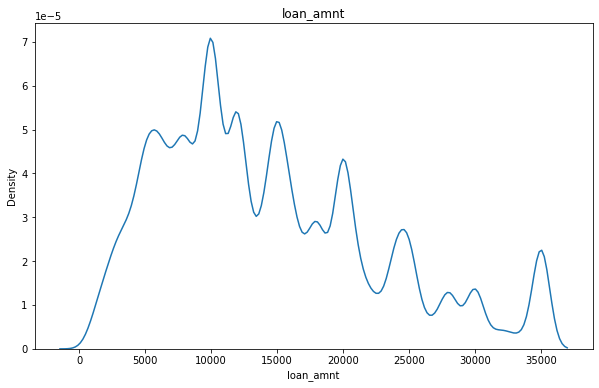

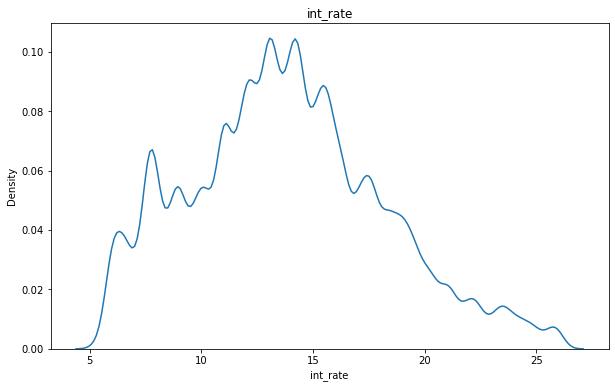

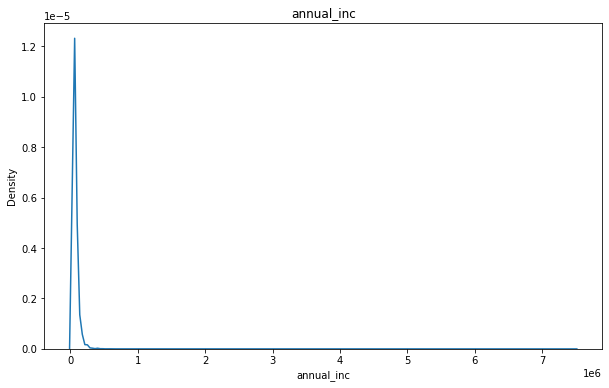

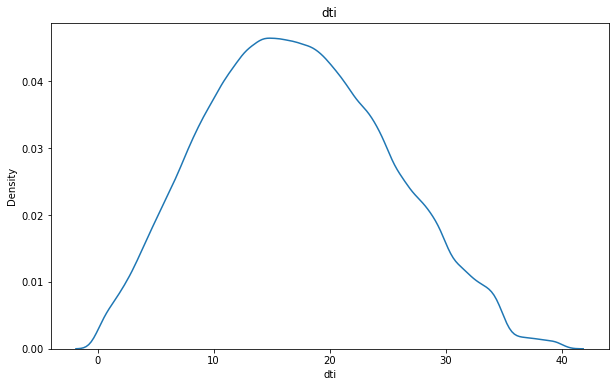

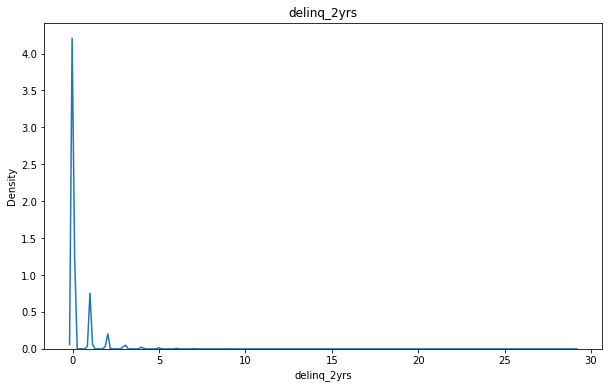

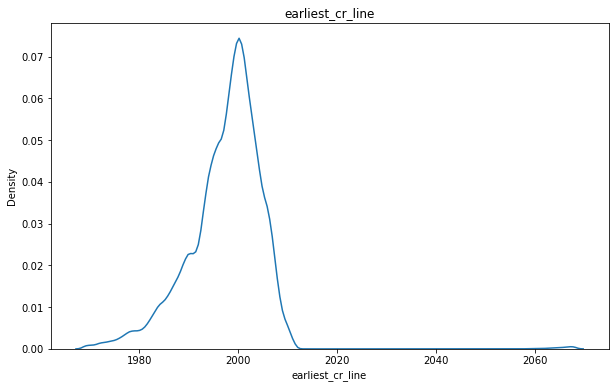

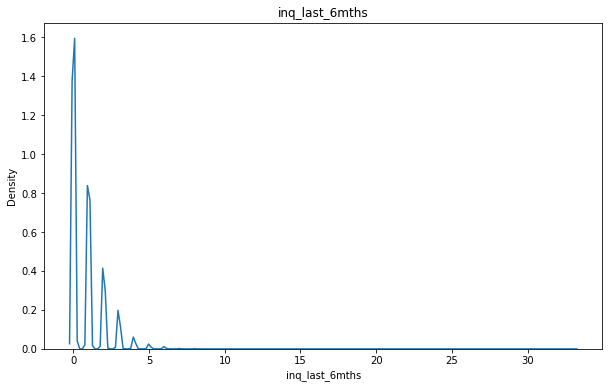

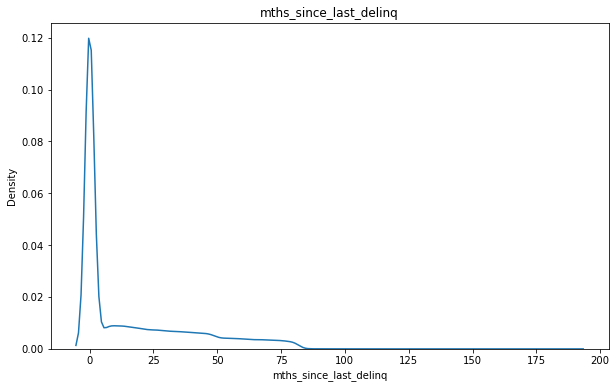

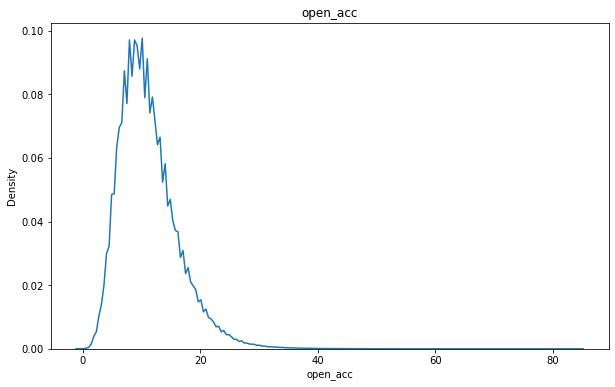

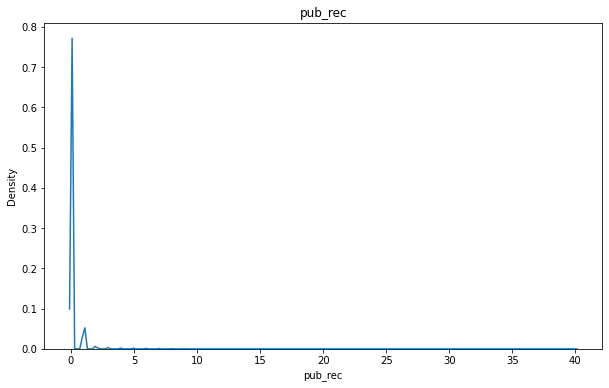

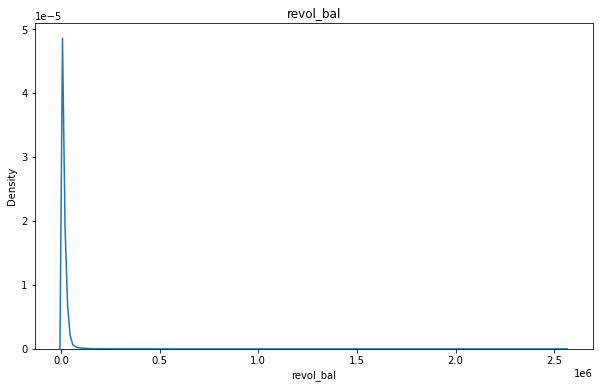

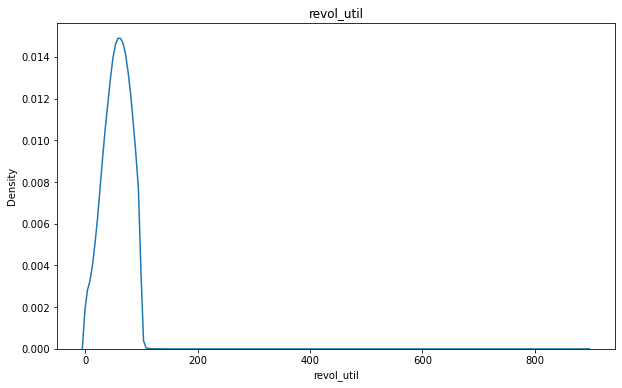

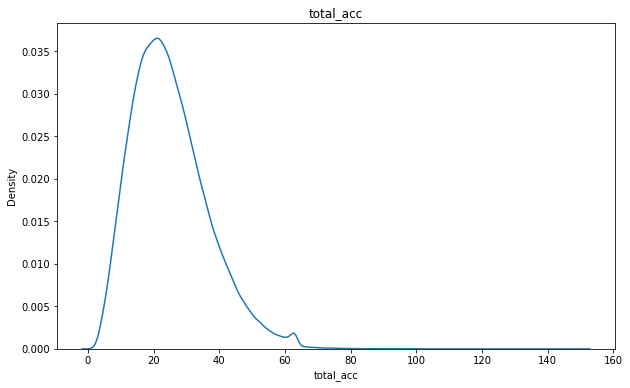

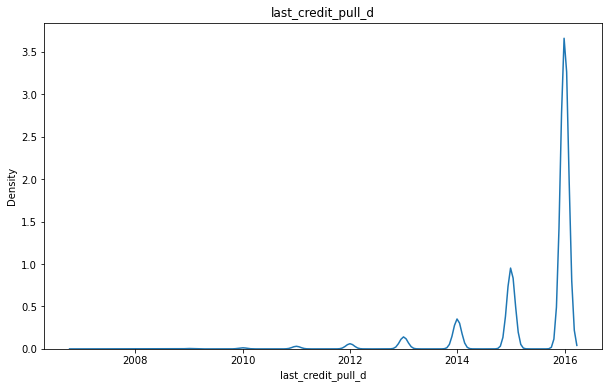

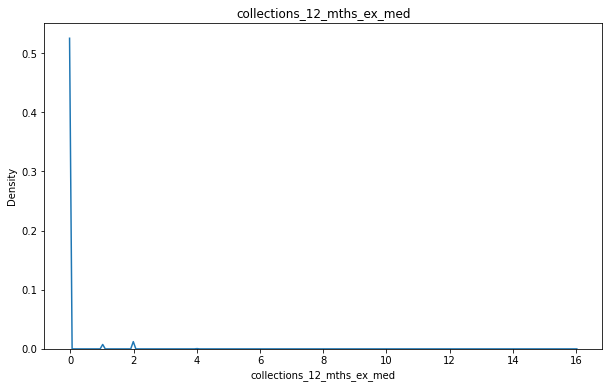

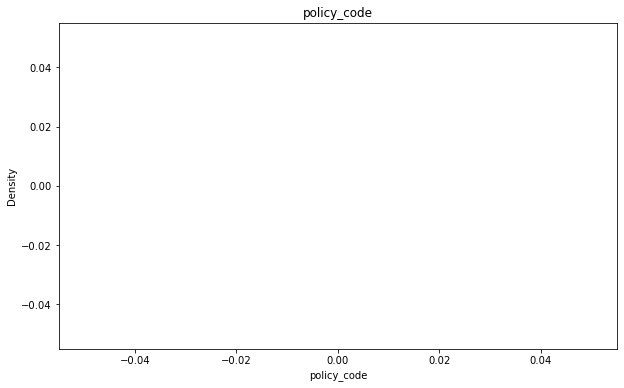

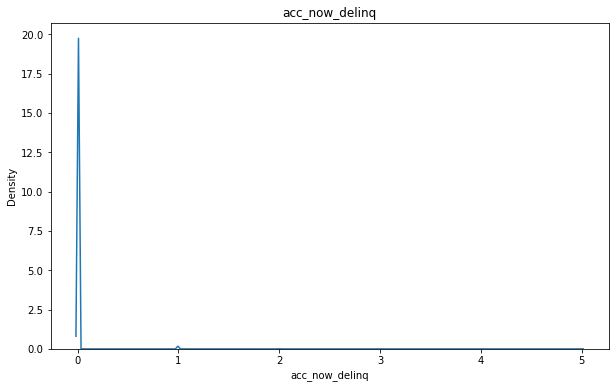

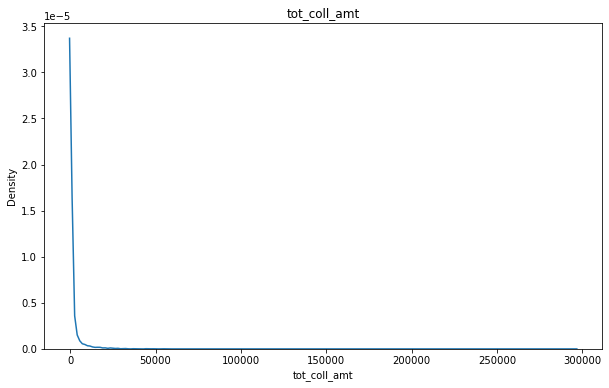

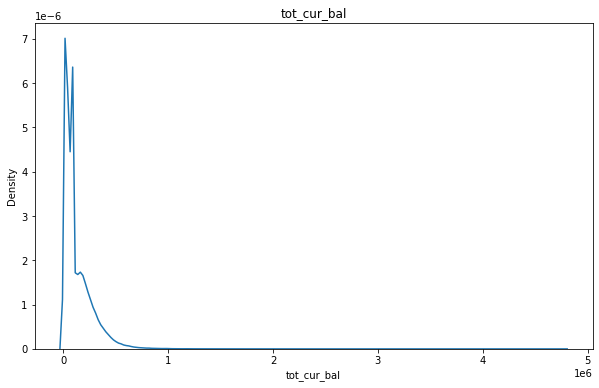

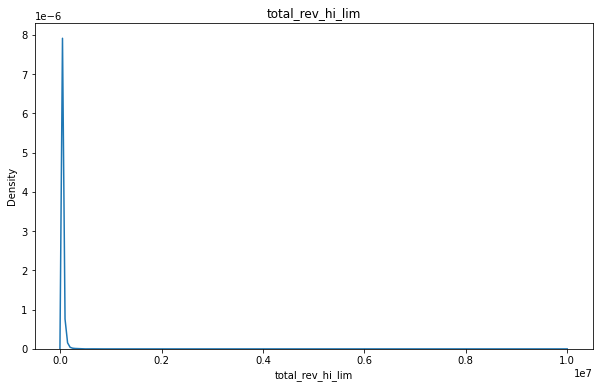

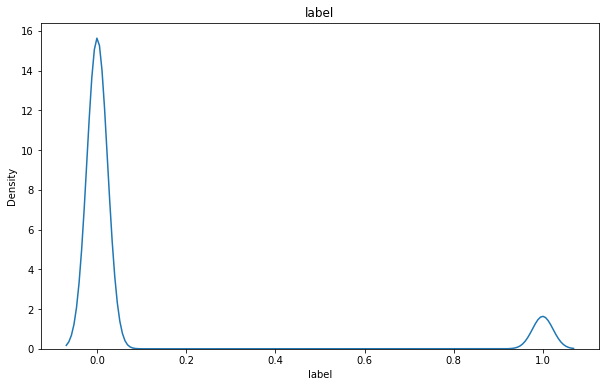

In [36]:
#check distribution data numeric whether outlier
df_num = train.select_dtypes("number").columns.to_list()
for i in df_num:
    plt.figure(figsize=(10,6))
    sns.kdeplot(x=i, data=train)
    plt.title(i)

In [68]:
df_clean_v2.shape

(466215, 29)

In [47]:
train.loc[train['annual_inc'] >= 250000, 'label'].shape

(3128,)

In [48]:
train.loc[train['delinq_2yrs'] >= 5, 'label'].shape

(1888,)

In [53]:
train.loc[train['earliest_cr_line'] >= 2016, 'label'].shape

(824,)

In [72]:
train.loc[train['inq_last_6mths'] >= 7, 'label'].shape

(328,)

In [78]:
train.loc[train['mths_since_last_delinq'] > 80, 'label'].shape

(1457,)

In [54]:
train.loc[train['revol_util'] >= 120, 'label'].shape

(23,)

In [55]:
train.loc[train['open_acc'] >= 40, 'label'].shape

(145,)

In [56]:
train.loc[train['pub_rec'] >= 5, 'label'].shape

(380,)

In [57]:
train.loc[train['total_acc'] >= 80, 'label'].shape

(126,)

In [58]:
train.loc[train['revol_bal'] >= 250000, 'label'].shape

(281,)

In [60]:
train.loc[train['acc_now_delinq'] >= 2, 'label'].shape

(83,)

In [62]:
train.loc[train['collections_12_mths_ex_med'] >= 2, 'label'].shape

(169,)

In [67]:
train.loc[train['tot_coll_amt'] >= 25000, 'label'].shape

(179,)

In [82]:
train.loc[train['tot_cur_bal'] >= 1000000, 'label'].shape

(476,)

In [85]:
train.loc[train['total_rev_hi_lim'] >= 300000, 'label'].shape

(292,)

In [36]:
#handling outlier with remove 
train = train[train['annual_inc'] <= 250000]
train = train[train['delinq_2yrs'] <= 5]
train = train[train['earliest_cr_line'] <= 2016]
train = train[train['inq_last_6mths'] <= 7]
train = train[train['mths_since_last_delinq'] < 80]
train = train[train['open_acc'] <= 40]
train = train[train['pub_rec'] <= 5]
train = train[train['revol_bal'] <= 250000]
train = train[train['revol_util'] <= 120]
train = train[train['total_acc'] <= 80]
train = train[train['collections_12_mths_ex_med'] <= 2]
train = train[train['acc_now_delinq'] <= 2]
train = train[train['tot_coll_amt'] <= 25000]
train = train[train['tot_cur_bal'] <= 1000000]
train = train[train['total_rev_hi_lim'] <= 300000]

In [37]:
train.shape

(318452, 29)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3604/848656809.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


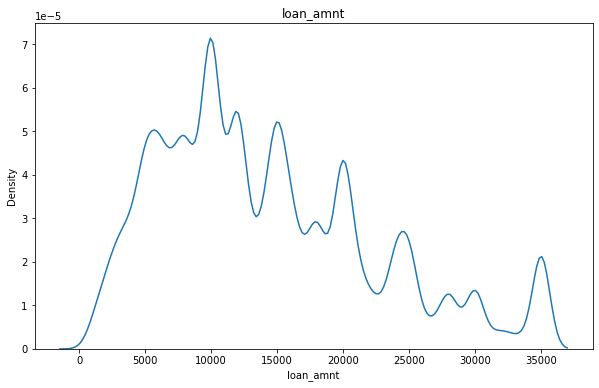

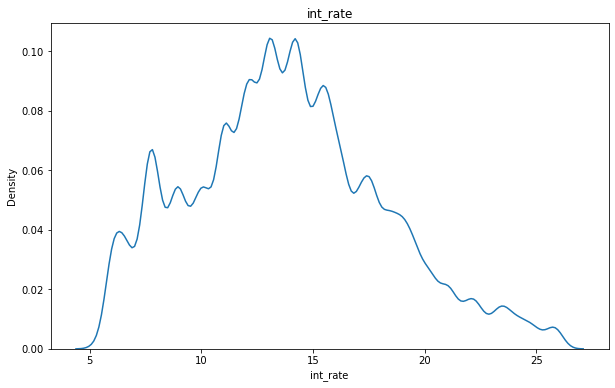

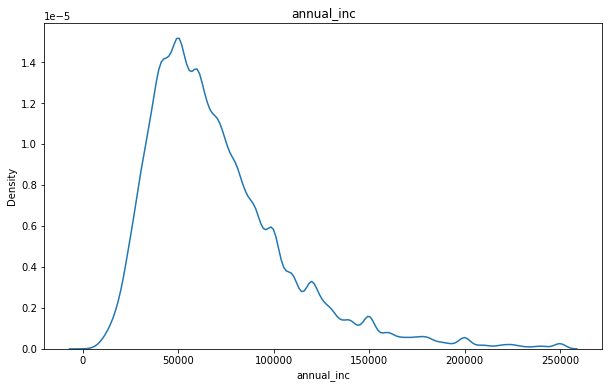

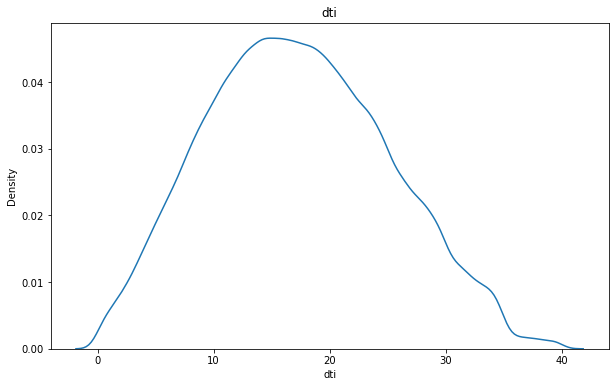

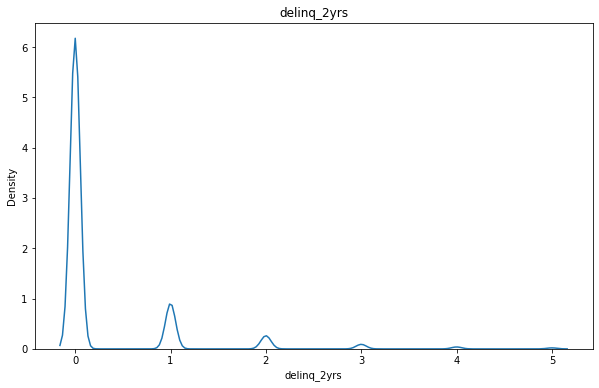

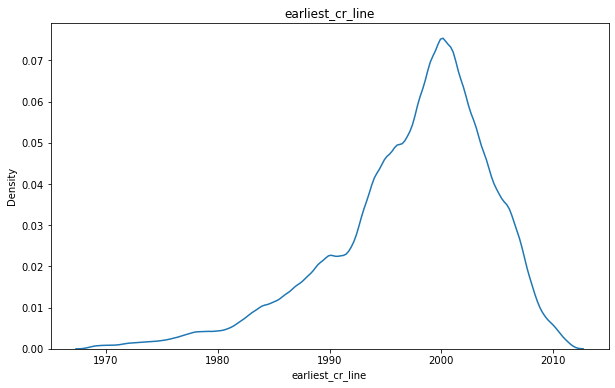

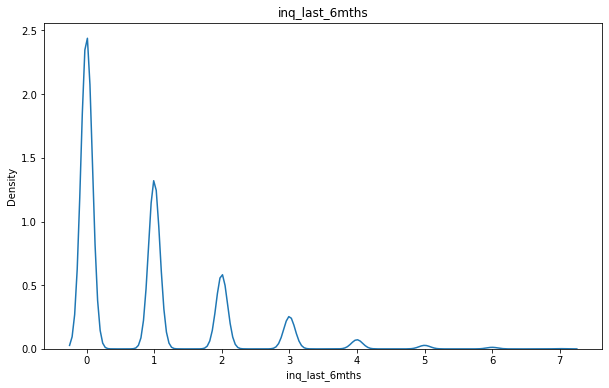

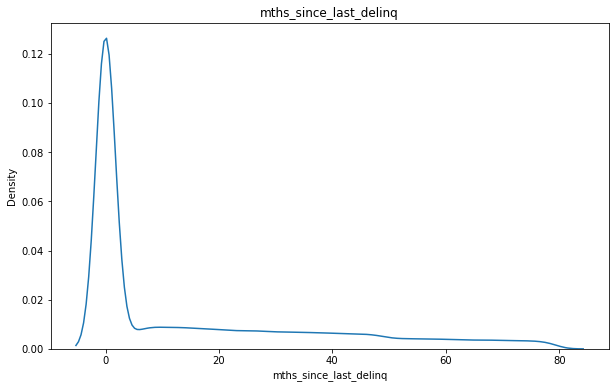

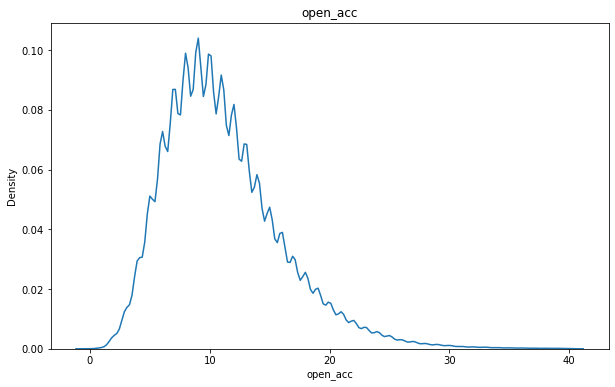

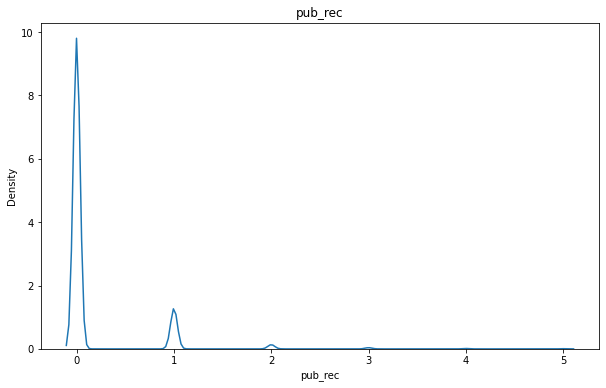

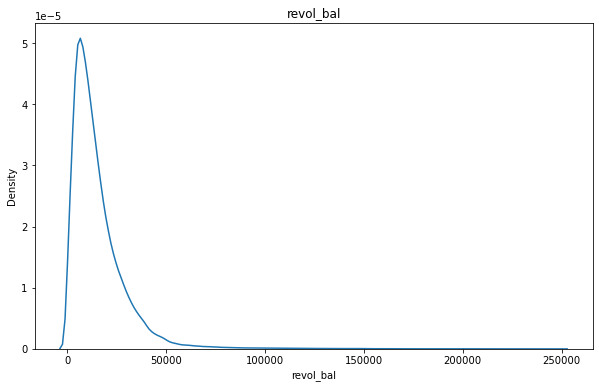

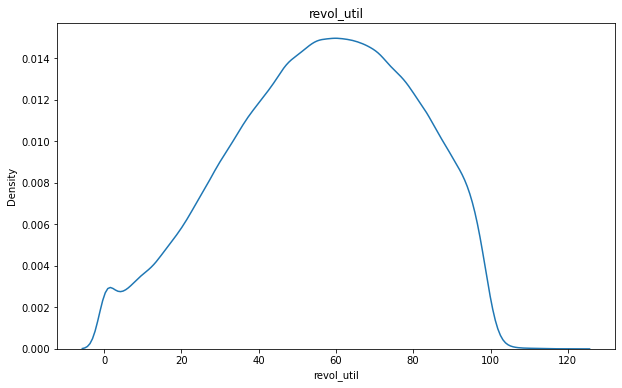

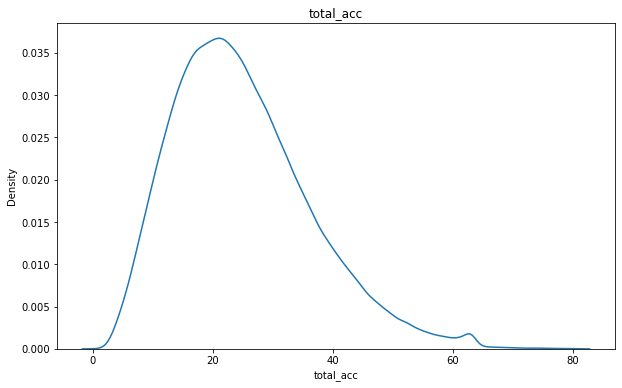

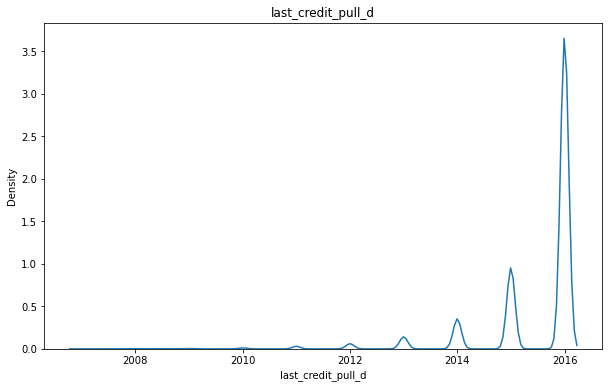

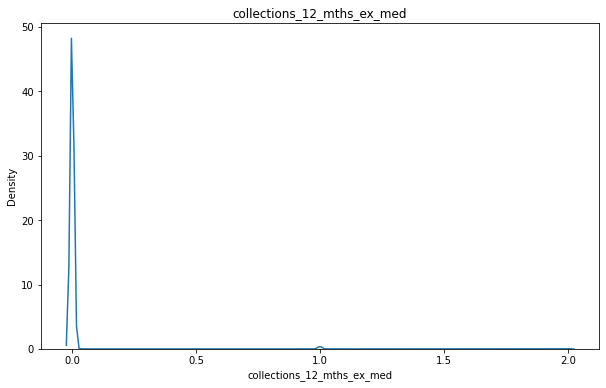

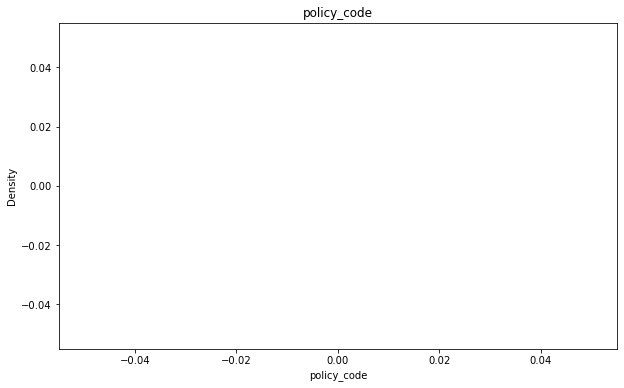

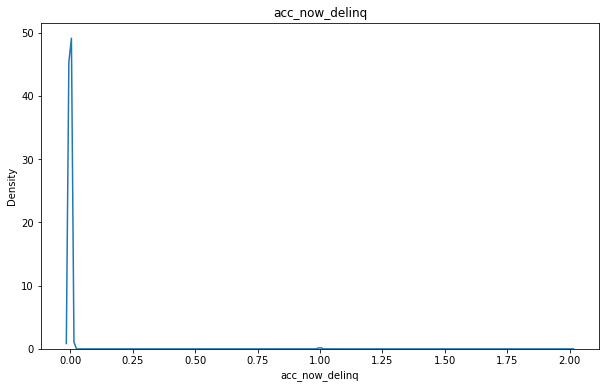

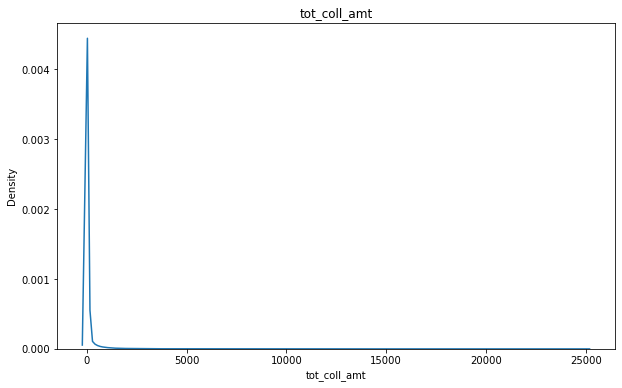

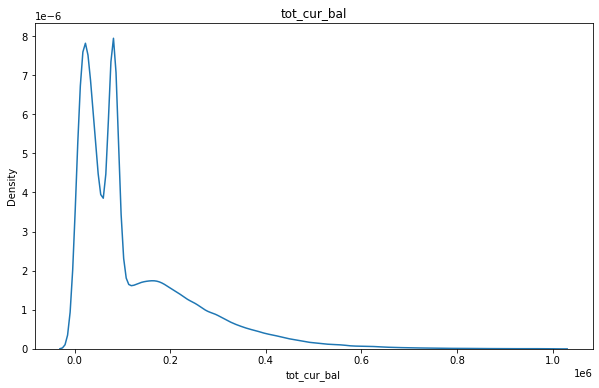

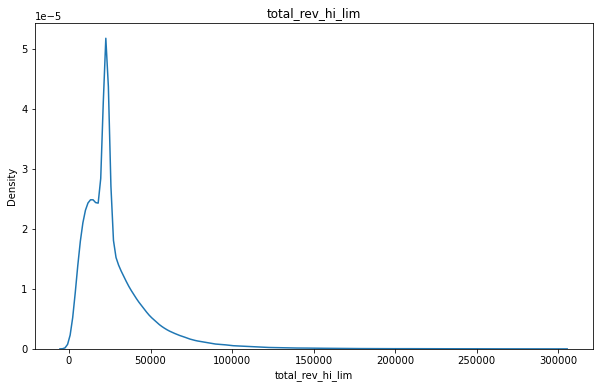

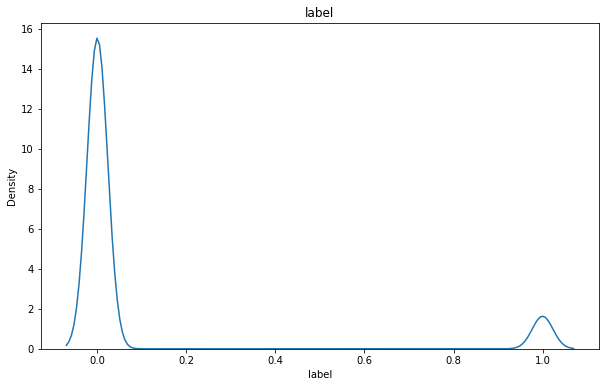

In [69]:
#check distribution data again
df_num = train.select_dtypes("number").columns.to_list()
for i in df_num:
    plt.figure(figsize=(10,6))
    sns.kdeplot(x=i, data=train)
    plt.title(i)

In [38]:
train.to_csv('data_clean_til_outlier_end.csv', index=False)

## Train-Test Split Target

In [38]:
X_train, y_train = train.drop('label', axis=1), train['label']
X_test, y_test = test.drop('label', axis=1), test['label']
print(X_train.shape)
print(X_test.shape)

(318452, 28)
(139865, 28)


In [40]:
#0 = 90.5% 1=9.5%
y_train.value_counts()

0    288266
1     30186
Name: label, dtype: int64

In [39]:
#0=90.5% 1=9.5%
y_test.value_counts()

0    126661
1     13204
Name: label, dtype: int64

In [41]:
#splitting ordinal and nominal features
ordinal_features = ['term', 'sub_grade', 'emp_length']
nominal_features = train.select_dtypes('object').drop(columns = ordinal_features).columns.tolist()

In [42]:
nominal_features

['home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'initial_list_status']

In [43]:
#encoding nominal features
le = LabelEncoder()
for col in nominal_features:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    
X_train

loan_amnt        term  int_rate sub_grade emp_length  home_ownership  \
7900        11200   36 months      5.42        A1  10+ years               3   
372823      24000   36 months     11.67        B4    6 years               0   
51108       18550   60 months     16.99        D1    5 years               0   
255765       9600   36 months     11.99        B5    4 years               0   
171237      10000   36 months     12.12        B3  10+ years               3   
...           ...         ...       ...       ...        ...             ...   
259224       9600   36 months      9.49        B2    2 years               3   
365899      10925   36 months     12.99        C1    9 years               3   
131975      16800   36 months     12.12        B3  10+ years               0   
146910      18000   36 months     10.16        B1    2 years               0   
122001       6500   36 months     10.64        B2    3 years               3   

        annual_inc  verification_status  purpose  addr_state    dti  \
7900       82000.0                    1        2           4  23.14   
372823    115000.0                    2        2           3  14.84   
51108      42000.0                    2        2          39  10.76   
255765     80000.0                    0        1          33   7.98   
171237     71000.0                    2        2          16  14.08   
...            ...                  ...      ...         ...    ...   
259224     50000.0                    1        2          36  17.09   
365899     56300.0                    1        2          27  28.29   
131975     74000.0                    0        2          46   9.65   
146910    160000.0                    1        1          10  10.15   
122001     45000.0                    0        2          11  22.67   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
7900            0.0            1984.0             0.0                     0.0   
372823          0.0            1985.0             1.0                     0.0   
51108           0.0            1999.0             0.0                     0.0   
255765          0.0            2002.0             0.0                     0.0   
171237          0.0            1998.0             0.0                     0.0   
...             ...               ...             ...                     ...   
259224          0.0            1997.0             0.0                     0.0   
365899          3.0            1992.0             2.0                     2.0   
131975          0.0            2000.0             0.0                     0.0   
146910          1.0            2002.0             0.0                    21.0   
122001          0.0            1999.0             0.0                    77.0   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
7900        18.0      0.0      13249        28.6       38.0   
372823       8.0      0.0      33028        86.7       21.0   
51108        8.0      0.0      14760        66.5       24.0   
255765       8.0      0.0       7502        48.7       15.0   
171237      10.0      0.0      12468        84.8       16.0   
...          ...      ...        ...         ...        ...   
259224      10.0      1.0       3876        56.2       25.0   
365899      16.0      0.0      20606        55.1       45.0   
131975      10.0      1.0       6858        47.3       18.0   
146910      14.0      0.0      17894        55.7       29.0   
122001      11.0      0.0      18568        72.0       37.0   

        initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
7900                      0              2016.0                         0.0   
372823                    1              2016.0                         0.0   
51108                     0              2015.0                         0.0   
255765                    1              2015.0                         0.0   
171237                    0              2016.0                      

In [44]:
#encoding ordinal features
ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train[ordinal_features] = ordinal.transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal.transform(X_test[ordinal_features])
X_train

loan_amnt  term  int_rate  sub_grade  emp_length  home_ownership  \
7900        11200   0.0      5.42        0.0         1.0               3   
372823      24000   0.0     11.67        8.0         6.0               0   
51108       18550   1.0     16.99       15.0         5.0               0   
255765       9600   0.0     11.99        9.0         4.0               0   
171237      10000   0.0     12.12        7.0         1.0               3   
...           ...   ...       ...        ...         ...             ...   
259224       9600   0.0      9.49        6.0         2.0               3   
365899      10925   0.0     12.99       10.0         9.0               3   
131975      16800   0.0     12.12        7.0         1.0               0   
146910      18000   0.0     10.16        5.0         2.0               0   
122001       6500   0.0     10.64        6.0         3.0               3   

        annual_inc  verification_status  purpose  addr_state    dti  \
7900       82000.0                    1        2           4  23.14   
372823    115000.0                    2        2           3  14.84   
51108      42000.0                    2        2          39  10.76   
255765     80000.0                    0        1          33   7.98   
171237     71000.0                    2        2          16  14.08   
...            ...                  ...      ...         ...    ...   
259224     50000.0                    1        2          36  17.09   
365899     56300.0                    1        2          27  28.29   
131975     74000.0                    0        2          46   9.65   
146910    160000.0                    1        1          10  10.15   
122001     45000.0                    0        2          11  22.67   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
7900            0.0            1984.0             0.0                     0.0   
372823          0.0            1985.0             1.0                     0.0   
51108           0.0            1999.0             0.0                     0.0   
255765          0.0            2002.0             0.0                     0.0   
171237          0.0            1998.0             0.0                     0.0   
...             ...               ...             ...                     ...   
259224          0.0            1997.0             0.0                     0.0   
365899          3.0            1992.0             2.0                     2.0   
131975          0.0            2000.0             0.0                     0.0   
146910          1.0            2002.0             0.0                    21.0   
122001          0.0            1999.0             0.0                    77.0   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
7900        18.0      0.0      13249        28.6       38.0   
372823       8.0      0.0      33028        86.7       21.0   
51108        8.0      0.0      14760        66.5       24.0   
255765       8.0      0.0       7502        48.7       15.0   
171237      10.0      0.0      12468        84.8       16.0   
...          ...      ...        ...         ...        ...   
259224      10.0      1.0       3876        56.2       25.0   
365899      16.0      0.0      20606        55.1       45.0   
131975      10.0      1.0       6858        47.3       18.0   
146910      14.0      0.0      17894        55.7       29.0   
122001      11.0      0.0      18568        72.0       37.0   

        initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
7900                      0              2016.0                         0.0   
372823                    1              2016.0                         0.0   
51108                     0              2015.0                         0.0   
255765                    1              2015.0                         0.0   
171237                    0              2016.0                         0.0   
...                     ...           

In [110]:
#Scaling for all features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X_test.columns
)


with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

loan_amnt      term  int_rate  sub_grade  emp_length  home_ownership  \
0  -0.368454 -0.616414 -1.928056  -1.693747   -0.822707        1.114000   
1   1.189029 -0.616414 -0.494269  -0.467828    0.766773       -0.975558   
2   0.525882  1.622287  0.726171   0.604851    0.448877       -0.975558   
3  -0.563139 -0.616414 -0.420859  -0.314588    0.130981       -0.975558   
4  -0.514468 -0.616414 -0.391036  -0.621068   -0.822707        1.114000   

   annual_inc  verification_status   purpose  addr_state       dti  \
0    0.312016            -0.045778 -0.271574   -1.256640  0.748019   
1    1.212322             1.168869 -0.271574   -1.324262 -0.312046   
2   -0.779265             1.168869 -0.271574    1.110127 -0.833139   
3    0.257452            -1.260426 -0.686827    0.704396 -1.188197   
4    0.011913             1.168869 -0.271574   -0.445177 -0.409113   

   delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0    -0.389193         -1.898541       -0.750761               -0.697996   
1    -0.389193         -1.756614        0.192257               -0.697996   
2    -0.389193          0.230375       -0.750761               -0.697996   
3    -0.389193          0.656159       -0.750761               -0.697996   
4    -0.389193          0.088447       -0.750761               -0.697996   

   open_acc   pub_rec  revol_bal  revol_util  total_acc  initial_list_status  \
0  1.393381 -0.347049  -0.154428   -1.160391   1.139501            -0.734062   
1 -0.638911 -0.347049   1.104399    1.291153  -0.342397             1.362283   
2 -0.638911 -0.347049  -0.058261    0.438809  -0.080886            -0.734062   
3 -0.638911 -0.347049  -0.520194   -0.312267  -0.865420             1.362283   
4 -0.232453 -0.347049  -0.204134    1.210982  -0.778249            -0.734062   

   last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0            0.516690                   -0.089287          0.0   
1            0.516690                   -0.089287          0.0   
2           -0.525513                   -0.089287          0.0   
3           -0.525513                   -0.089287          0.0   
4            0.516690                   -0.089287          0.0   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0       -0.058987     -0.131081    -0.349664         -0.245016  
1       -0.058987     -0.131081     1.592573          0.407611  
2       -0.058987     -0.131081     0.631526         -0.270609  
3       -0.058987     -0.131081    -0.176357         -0.560665  
4       -0.058987     -0.131081    -0.763723         -0.590524

## Handling imbalance data

## Undersample

In [76]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
y_train_under.shape

(60372,)

In [77]:
X_train_under.shape

(60372, 28)

In [78]:
y_train_under.value_counts()

0    30186
1    30186
Name: label, dtype: int64

- Ketidakseimbangan data sebaiknya ditangani sebelum melakukan penskalaan fitur

In [79]:
scaler = StandardScaler()
scaler.fit(X_train_under)

X_train_scaled_under = pd.DataFrame(
    scaler.transform(X_train_under),
    columns=X_train.columns
)

X_test_scaled_under = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X_test.columns
)


with pd.option_context("display.max_columns", None):
    display(X_train_scaled_under)

loan_amnt      term  int_rate  sub_grade  emp_length  home_ownership  \
0      -1.065584 -0.668845  0.044400   0.224624   -0.835963       -1.031036   
1       0.444248 -0.668845 -1.835086  -1.680730   -0.835963       -1.031036   
2      -0.280471 -0.668845 -1.042424  -0.947902    0.114109       -1.031036   
3      -0.280471 -0.668845 -1.323112  -1.241033   -0.835963       -1.031036   
4      -0.038898 -0.668845 -0.182396  -0.068508    2.014252        1.053060   
...          ...       ...       ...        ...         ...             ...   
60367  -1.606104 -0.668845 -0.775209  -0.215073    0.747490        1.053060   
60368   0.154360 -0.668845  1.039158   1.397149   -0.835963       -1.031036   
60369  -0.129488  1.495115  2.478526   2.716240   -0.835963       -1.031036   
60370   0.408012  1.495115  0.623740   0.810886    2.014252       -1.031036   
60371  -0.935739 -0.668845  0.336316   0.224624   -0.835963        1.053060   

       annual_inc  verification_status   purpose  addr_state       dti  \
0       -0.232240            -1.312605 -0.314930    0.104332 -0.461180   
1       -0.437217            -0.103908 -0.703092    0.716269  0.603273   
2       -0.268280            -1.312605 -0.314930   -1.459507 -1.292783   
3        2.322099             1.104789 -0.314930   -0.915563  0.610949   
4       -0.155654            -0.103908 -0.314930    0.648276 -0.699146   
...           ...                  ...       ...         ...       ...   
60367   -1.563469            -1.312605  2.402204    1.328206  0.346115   
60368    2.268940            -0.103908  0.461394    0.716269 -1.442472   
60369    0.210377            -0.103908  3.178527    1.328206  0.708183   
60370   -0.606155            -1.312605 -0.314930   -0.371619  1.368348   
60371   -0.634311            -1.312605 -0.314930    1.600178  0.714580   

       delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0        -0.386408         -0.671566        0.081392               -0.687664   
1         7.101620         -0.671566        0.081392                0.140045   
2        -0.386408          1.200547        0.081392               -0.687664   
3        -0.386408         -4.127775       -0.796225               -0.687664   
4         1.111198         -0.815575        0.081392               -0.273809   
...            ...               ...             ...                     ...   
60367    -0.386408          1.056539        1.836625               -0.687664   
60368    -0.386408         -2.687688        0.959008                0.507916   
60369    -0.386408          1.344556        0.959008               -0.687664   
60370    -0.386408          1.344556       -0.796225               -0.687664   
60371    -0.386408          1.344556        0.081392               -0.687664   

       open_acc   pub_rec  revol_bal  revol_util  total_acc  \
0     -0.621174  1.976428  -0.621554    0.607922  -0.304013   
1     -0.007880 -0.339314  -0.912694   -2.109599   0.219718   
2     -0.007880 -0.339314  -0.162629   -0.106325   0.568871   
3     -0.416742 -0.339314   0.830470   -0.495146   0.132429   
4     -0.007880  1.976428  -0.513969    0.506490  -0.129436   
...         ...       ...        ...         ...        ...   
60367 -1.438899 -0.339314  -0.977363   -1.932093  -1.264186   
60368  2.649727 -0.339314   1.019481    1.385564   1.441756   
60369 -0.007880 -0.339314  -0.422027    1.013648  -0.653167   
60370  1.627571 -0.339314   0.301422    0.772748   0.045141   
60371 -0.416742 -0.339314   0.261858    0.688222  -1.089609   

       initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
0                 1.489279            0.657626                   -0.086594   
1                -0.671466           -0.230030                   -0.086594   
2                -0.671466           -0.230030                   -0.086594   
3                -0.671466            0.657626                   -0.086594   
4                -0.671466            0.657626               

## Oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

# initialize the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')  # to oversample the minority class

# fit the sampler to the training data
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
X_train_over.shape

(576532, 28)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train_over)

X_train_scaled_over = pd.DataFrame(
    scaler.transform(X_train_over),
    columns=X_train.columns
)

X_test_scaled_over = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X_test.columns
)


with pd.option_context("display.max_columns", None):
    display(X_train_scaled_over)

loan_amnt      term  int_rate  sub_grade  emp_length  home_ownership  \
0       -0.376493 -0.670348 -2.107022  -1.828901   -0.835148        1.050193   
1        1.173311 -0.670348 -0.701250  -0.654435    0.745415       -1.033397   
2        0.513434  1.491762  0.495343   0.373222    0.429303       -1.033397   
3       -0.570218 -0.670348 -0.629274  -0.507627    0.113190       -1.033397   
4       -0.521787 -0.670348 -0.600034  -0.801243   -0.835148        1.050193   
...           ...       ...       ...        ...         ...             ...   
576527   0.567919  1.491762  0.891209   0.666839   -0.835148        0.355663   
576528  -0.736701 -0.670348  0.929446   0.813647    0.429303       -1.033397   
576529  -1.054532 -0.670348  1.395037   1.547688    1.377641       -1.033397   
576530   0.810076  1.491762 -0.600034  -0.801243   -0.519035       -1.033397   
576531  -0.527841 -0.670348  0.495343   0.373222    2.009866        1.050193   

        annual_inc  verification_status   purpose  addr_state       dti  \
0         0.412952            -0.103813 -0.315318   -1.250400  0.696024   
1         1.344480             1.105648 -0.315318   -1.318320 -0.365377   
2        -0.716172             1.105648 -0.315318    1.126809 -0.887127   
3         0.356496            -1.313273 -0.702578    0.719287 -1.242632   
4         0.102443             1.105648 -0.315318   -0.435357 -0.462566   
...            ...                  ...       ...         ...       ...   
576527   -0.546803             1.105648  0.459200    0.040085 -0.038005   
576528   -1.054909             1.105648 -0.315318   -0.503277  0.877613   
576529   -0.213711            -0.103813  0.459200   -0.027836 -1.277160   
576530    0.356496             1.105648 -0.315318    1.330570  0.229263   
576531   -0.603259            -1.313273 -0.702578    0.990968  0.121844   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         -0.386084         -1.974590       -0.796771               -0.688445   
1         -0.386084         -1.830438        0.084256               -0.688445   
2         -0.386084          0.187688       -0.796771               -0.688445   
3         -0.386084          0.620143       -0.796771               -0.688445   
4         -0.386084          0.043536       -0.796771               -0.688445   
...             ...               ...             ...                     ...   
576527     1.115527          0.764295        0.965284                0.090814   
576528     1.115527          1.485054        0.084256               -0.092541   
576529    -0.386084          0.908447        4.489394               -0.688445   
576530    -0.386084         -0.821375       -0.796771               -0.688445   
576531    -0.386084          1.196751        0.084256               -0.688445   

        open_acc   pub_rec  revol_bal  revol_util  total_acc  \
0       1.417517 -0.339565  -0.133922   -1.225905   1.178230   
1      -0.622751 -0.339565   1.162928    1.228997  -0.305679   
2      -0.622751 -0.339565  -0.034851    0.375485  -0.043813   
3      -0.622751 -0.339565  -0.510736   -0.376619  -0.829412   
4      -0.214697 -0.339565  -0.185130    1.148716  -0.742123   
...          ...       ...        ...         ...        ...   
576527 -0.826777 -0.339565  -0.658655   -0.051270  -1.178567   
576528 -0.214697 -0.339565  -0.520178   -1.145624  -0.742123   
576529 -0.418724 -0.339565  -0.674326    0.633229  -1.091278   
576530  0.805437 -0.339565   0.868597   -0.997739   0.741786   
576531 -1.030804 -0.339565  -0.477100    1.169843  -0.742123   

        initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
0                 -0.670715            0.656484                   -0.084807   
1                  1.490946            0.656484                   -0.084807   
2                 -0.670715           -0.232279                   -0.084807   
3                  1.490946           -0.232279                   -0.084807   
4        

## overunder

In [91]:
#https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf
# instantiating over and under sampler
over = RandomOverSampler()
under = RandomUnderSampler()
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {y_over}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {y_combined_sampling}")

In [92]:
scaler = StandardScaler()
scaler.fit(X_combined_sampling)

X_train_scaled_combined = pd.DataFrame(
    scaler.transform(X_combined_sampling),
    columns=X_train.columns
)

X_test_scaled_combined = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X_test.columns
)


with pd.option_context("display.max_columns", None):
    display(X_train_scaled_combined)

loan_amnt      term  int_rate  sub_grade  emp_length  home_ownership  \
0       -0.375535 -0.670104 -2.105510  -1.827578   -0.834923        1.052764   
1        1.171980 -0.670104 -0.700680  -0.653439    0.748649       -1.030589   
2        0.513077  1.492306  0.495110   0.373933    0.431935       -1.030589   
3       -0.568974 -0.670104 -0.628753  -0.506672    0.115220       -1.030589   
4       -0.520614 -0.670104 -0.599533  -0.800206   -0.834923        1.052764   
...           ...       ...       ...        ...         ...             ...   
576527  -0.550839 -0.670104 -0.156730  -0.506672    1.698792        1.052764   
576528   0.618864  1.492306  0.558047   0.227166    0.115220       -1.030589   
576529   0.809281 -0.670104 -1.611010  -1.534043    1.065364       -1.030589   
576530  -0.747301 -0.670104  0.928922   0.814235   -1.151637       -1.030589   
576531   0.313593 -0.670104 -1.595276  -1.387276   -0.834923        0.358313   

        annual_inc  verification_status   purpose  addr_state       dti  \
0         0.411927            -0.103188 -0.315458   -1.251573  0.696803   
1         1.343340             1.106767 -0.315458   -1.319511 -0.365173   
2        -0.717058             1.106767 -0.315458    1.126262 -0.887204   
3         0.355478            -1.313142 -0.702738    0.718633 -1.242902   
4         0.101456             1.106767 -0.315458   -0.436315 -0.462414   
...            ...                  ...       ...         ...       ...   
576527   -1.112203            -0.103188  2.395501   -0.911882 -0.398439   
576528    0.242579             1.106767 -0.315458    0.854509  0.573972   
576529    0.722398             1.106767 -0.315458    0.718633 -0.055536   
576530   -0.886406            -0.103188 -0.315458    0.786571  2.005720   
576531    0.496601            -1.313142 -0.702738    0.990386  1.066575   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         -0.386270         -1.973582       -0.797128               -0.688148   
1         -0.386270         -1.829461        0.087364               -0.688148   
2         -0.386270          0.188228       -0.797128               -0.688148   
3         -0.386270          0.620589       -0.797128               -0.688148   
4         -0.386270          0.044107       -0.797128               -0.688148   
...             ...               ...             ...                     ...   
576527    -0.386270          0.620589        0.087364               -0.688148   
576528     1.117078          0.332348        1.856349               -0.367487   
576529    -0.386270         -0.676496       -0.797128               -0.688148   
576530    -0.386270          0.188228       -0.797128               -0.688148   
576531    -0.386270          0.332348       -0.797128               -0.688148   

        open_acc   pub_rec  revol_bal  revol_util  total_acc  \
0       1.418651 -0.340675  -0.134886   -1.226629   1.177180   
1      -0.624849 -0.340675   1.166332    1.229820  -0.307140   
2      -0.624849 -0.340675  -0.035481    0.375770  -0.045201   
3      -0.624849 -0.340675  -0.512969   -0.376808  -0.831017   
4      -0.216149 -0.340675  -0.186267    1.149488  -0.743704   
...          ...       ...        ...         ...        ...   
576527 -1.033548 -0.340675   0.115700   -0.554383  -1.005643   
576528  0.396901 -0.340675  -0.708951   -1.674794   0.129425   
576529  0.601251 -0.340675  -0.357118   -0.512103   1.439118   
576530 -0.829199 -0.340675  -0.647834    0.557573   0.304051   
576531  1.623001 -0.340675   1.080873   -0.338756   1.613744   

        initial_list_status  last_credit_pull_d  collections_12_mths_ex_med  \
0                 -0.671729            0.657847                    -0.08526   
1                  1.488695            0.657847                    -0.08526   
2                 -0.671729           -0.234049                    -0.08526   
3                  1.488695           -0.234049                    -0.08526   
4        

## Modelling

- LogisticRegression
- DecisionTree
- XGBoost
- Random Forest
- LightGBM

In [47]:
#function for modelling
def model_assess(model, x_train, y_train, x_test, y_test, name='Default'):
    model.fit(x_train, y_train)
    preds_train = model.predict(x_train)
    print('                   ', name, '\n',
    classification_report(y_train, preds_train))
    # Confusion Matrix untuk train set
    cm_train = confusion_matrix(y_train, preds_train)
    ConfusionMatrixDisplay(cm_train).plot()
    
    preds = model.predict(x_test)
    preds_proba = model.predict_proba(x_test)[::,1]
    print('                   ', name, '\n',
    classification_report(y_test, preds))
    
    # Confusion Matrix untuk test set
    cm_test = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(cm_test).plot()
    
    # Menghitung ROC AUC score
    roc_auc = roc_auc_score(y_test, preds_proba)
    print("ROC AUC: ", roc_auc)

## Without handling imbalanced data

In [112]:
#Logistic Regression
lg = LogisticRegression()
model_assess(lg, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    288266
           1       0.39      0.02      0.03     30186

    accuracy                           0.90    318452
   macro avg       0.65      0.51      0.49    318452
weighted avg       0.86      0.90      0.86    318452

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    126661
           1       0.38      0.02      0.03     13204

    accuracy                           0.90    139865
   macro avg       0.64      0.51      0.49    139865
weighted avg       0.86      0.90      0.86    139865



In [114]:
dec_tree = DecisionTreeClassifier()
model_assess(dec_tree, X_train_scaled, y_train, X_test_scaled, y_test, name='DecisionTree')

                    DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    288266
           1       1.00      1.00      1.00     30186

    accuracy                           1.00    318452
   macro avg       1.00      1.00      1.00    318452
weighted avg       1.00      1.00      1.00    318452

                    DecisionTree 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91    126661
           1       0.18      0.21      0.19     13204

    accuracy                           0.83    139865
   macro avg       0.55      0.55      0.55    139865
weighted avg       0.85      0.83      0.84    139865



                    XGBoost 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     82844
           1       0.52      0.04      0.07     10412

    accuracy                           0.89     93256
   macro avg       0.71      0.52      0.50     93256
weighted avg       0.85      0.89      0.84     93256



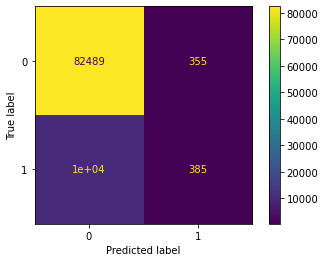

In [83]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, X_train_scaled, y_train, X_test_scaled, y_test ,'XGBoost')

                    RandomForest 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     82844
           1       0.51      0.02      0.04     10412

    accuracy                           0.89     93256
   macro avg       0.70      0.51      0.49     93256
weighted avg       0.85      0.89      0.84     93256



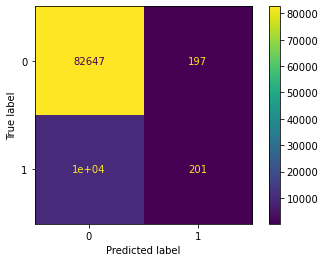

In [84]:
rf = RandomForestClassifier()
model_assess(rf, X_train_scaled, y_train, X_test_scaled, y_test ,'RandomForest')

## Modeling with handling imbalance data

## Undersampling

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.69      0.68     30186
           1       0.68      0.64      0.66     30186

    accuracy                           0.67     60372
   macro avg       0.67      0.67      0.67     60372
weighted avg       0.67      0.67      0.67     60372

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.57      0.71    126661
           1       0.15      0.76      0.25     13204

    accuracy                           0.58    139865
   macro avg       0.56      0.66      0.48    139865
weighted avg       0.88      0.58      0.67    139865

ROC AUC:  0.7305687340165236


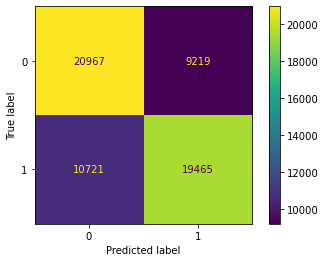

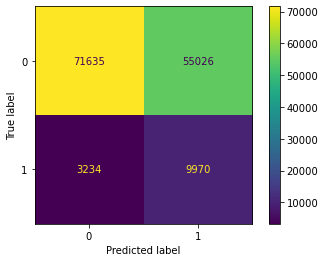

In [85]:
#Logistic Regression
lg = LogisticRegression()
model_assess(lg, X_train_scaled_under, y_train_under, X_test_scaled_under, y_test, 'Logistic Regression')

                    DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30186
           1       1.00      1.00      1.00     30186

    accuracy                           1.00     60372
   macro avg       1.00      1.00      1.00     60372
weighted avg       1.00      1.00      1.00     60372

                    DecisionTree 
               precision    recall  f1-score   support

           0       0.93      0.60      0.73    126661
           1       0.13      0.59      0.22     13204

    accuracy                           0.60    139865
   macro avg       0.53      0.59      0.47    139865
weighted avg       0.86      0.60      0.68    139865

ROC AUC:  0.5946063518627908


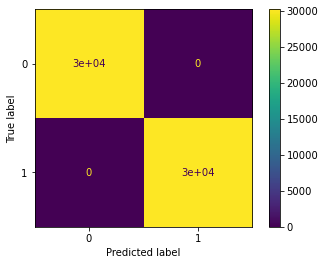

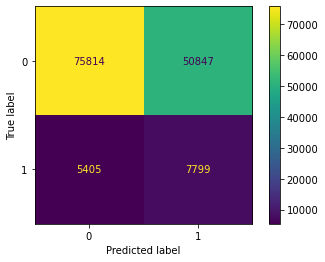

In [87]:
dec_tree = DecisionTreeClassifier()
model_assess(dec_tree, X_train_scaled_under, y_train_under, X_test_scaled_under, y_test, name='DecisionTree')

                    XGBoost 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     30186
           1       0.83      0.81      0.82     30186

    accuracy                           0.82     60372
   macro avg       0.82      0.82      0.82     60372
weighted avg       0.82      0.82      0.82     60372

                    XGBoost 
               precision    recall  f1-score   support

           0       0.95      0.71      0.82    126661
           1       0.19      0.65      0.29     13204

    accuracy                           0.71    139865
   macro avg       0.57      0.68      0.55    139865
weighted avg       0.88      0.71      0.77    139865

ROC AUC:  0.74609330387756


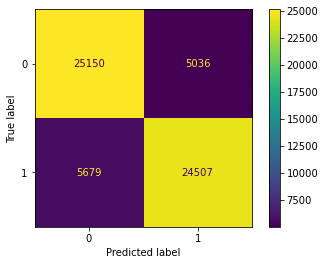

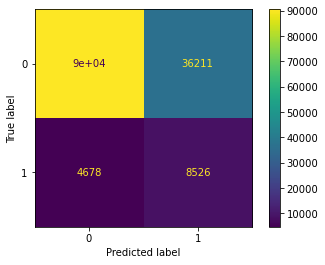

In [86]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb,X_train_scaled_under, y_train_under, X_test_scaled_under, y_test,'XGBoost')

                    RandomForest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30186
           1       1.00      1.00      1.00     30186

    accuracy                           1.00     60372
   macro avg       1.00      1.00      1.00     60372
weighted avg       1.00      1.00      1.00     60372

                    RandomForest 
               precision    recall  f1-score   support

           0       0.95      0.71      0.82    126661
           1       0.19      0.65      0.30     13204

    accuracy                           0.71    139865
   macro avg       0.57      0.68      0.56    139865
weighted avg       0.88      0.71      0.77    139865

ROC AUC:  0.749296311234313


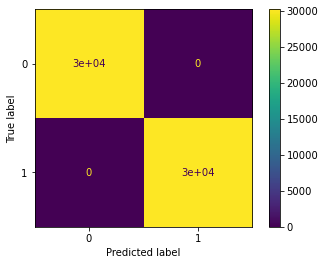

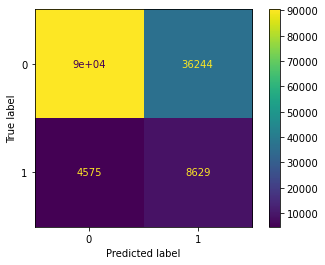

In [88]:
rf = RandomForestClassifier()
model_assess(rf, X_train_scaled_under, y_train_under, X_test_scaled_under, y_test ,'RandomForest')

                    lgbm_overunder 
               precision    recall  f1-score   support

           0       0.72      0.75      0.74     30186
           1       0.74      0.71      0.73     30186

    accuracy                           0.73     60372
   macro avg       0.73      0.73      0.73     60372
weighted avg       0.73      0.73      0.73     60372

                    lgbm_overunder 
               precision    recall  f1-score   support

           0       0.95      0.71      0.82    126661
           1       0.19      0.65      0.30     13204

    accuracy                           0.71    139865
   macro avg       0.57      0.68      0.56    139865
weighted avg       0.88      0.71      0.77    139865

ROC AUC:  0.7503953805366552


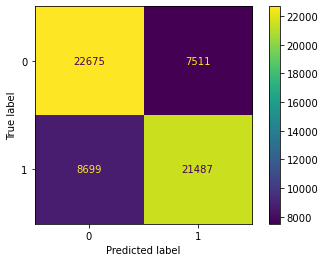

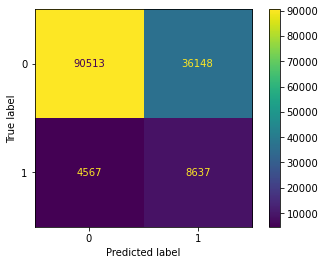

In [89]:
lgbm = lgb.LGBMClassifier()
model_assess(lgbm,X_train_scaled_under, y_train_under, X_test_scaled_under, y_test,'lgbm_overunder')

## Oversampling modelling

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68    288266
           1       0.68      0.65      0.66    288266

    accuracy                           0.67    576532
   macro avg       0.67      0.67      0.67    576532
weighted avg       0.67      0.67      0.67    576532

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.57      0.71    126661
           1       0.15      0.76      0.26     13204

    accuracy                           0.59    139865
   macro avg       0.56      0.66      0.48    139865
weighted avg       0.88      0.59      0.67    139865

ROC AUC:  0.7305199051208691


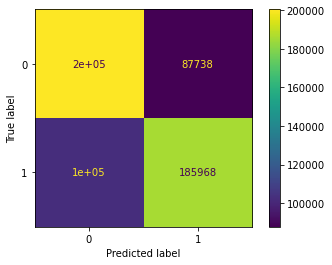

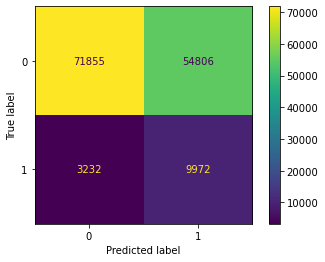

In [50]:
#Logistic Regression
lg = LogisticRegression()
model_assess(lg, X_train_scaled_over, y_train_over, X_test_scaled_over, y_test, 'Logistic Regression')

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Tentukan hyperparameters yang akan di-tuning
# hyperparameters = {'C': [0.01, 0.1, 1, 10, 100],
#                    'penalty': ['l1', 'l2'],
#                    'solver': ['newton-cg', 'lbfgs', 'liblinear']}
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Inisialisasi model
logreg = LogisticRegression()

# Inisialisasi RandomizedSearchCV
randomized_lg = RandomizedSearchCV(logreg, hyperparameters, cv=5, n_iter=20, random_state=42, n_jobs=-1)

# Fit model dengan RandomizedSearchCV
randomized_lg.fit(X_train, y_train)

# Cetak hyperparameters terbaik
print("Best Hyperparameters: ", randomized_lg.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Valu

Best Hyperparameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}


 hyperparameters = {'C': [0.01, 0.1, 1, 10, 100],
                    'penalty': ['l1', 'l2'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear']}
- Best Hyperparameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68    288266
           1       0.68      0.64      0.66    288266

    accuracy                           0.67    576532
   macro avg       0.67      0.67      0.67    576532
weighted avg       0.67      0.67      0.67    576532

                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.96      0.57      0.71    126661
           1       0.15      0.76      0.26     13204

    accuracy                           0.59    139865
   macro avg       0.56      0.66      0.48    139865
weighted avg       0.88      0.59      0.67    139865

ROC AUC:  0.730583073614329


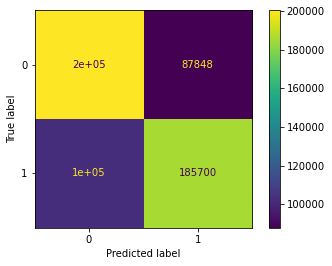

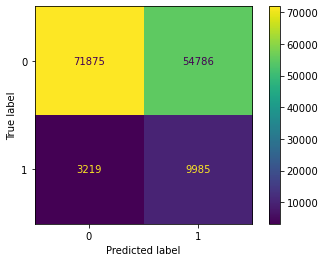

In [59]:
#Logistic Regression
lg_best = LogisticRegression(solver='liblinear', penalty='l2', C=1)
model_assess(lg_best, X_train_scaled_over, y_train_over, X_test_scaled_over, y_test, 'Logistic Regression_best')

                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68    288266
           1       0.68      0.64      0.66    288266

    accuracy                           0.67    576532
   macro avg       0.67      0.67      0.67    576532
weighted avg       0.67      0.67      0.67    576532

                    Logistic Regression_best 
               precision    recall  f1-score   support

           0       0.96      0.57      0.71    126661
           1       0.15      0.76      0.26     13204

    accuracy                           0.59    139865
   macro avg       0.56      0.66      0.48    139865
weighted avg       0.88      0.59      0.67    139865

ROC AUC:  0.7305823172307403


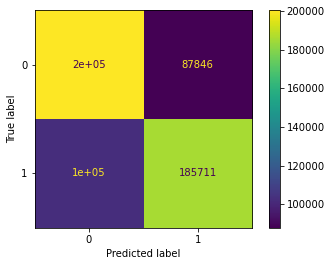

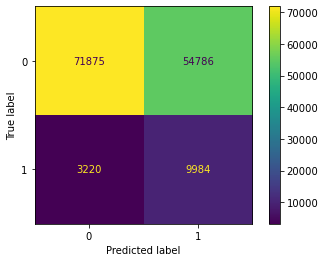

In [53]:
#Logistic Regression
lg_best = LogisticRegression(solver='liblinear', penalty='l2', C=10)
model_assess(lg_best, X_train_scaled_over, y_train_over, X_test_scaled_over, y_test, 'Logistic Regression_best')

                    DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    288266
           1       1.00      1.00      1.00    288266

    accuracy                           1.00    576532
   macro avg       1.00      1.00      1.00    576532
weighted avg       1.00      1.00      1.00    576532

                    DecisionTree 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91    126661
           1       0.17      0.19      0.18     13204

    accuracy                           0.84    139865
   macro avg       0.54      0.55      0.55    139865
weighted avg       0.84      0.84      0.84    139865

ROC AUC:  0.5467250502795377


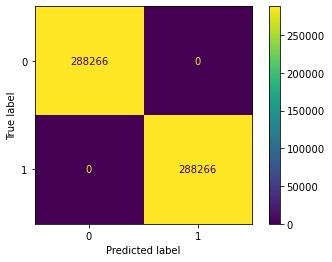

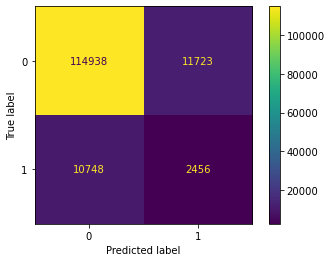

In [51]:
dec_tree = DecisionTreeClassifier()
model_assess(dec_tree, X_train_scaled_over, y_train_over, X_test_scaled_over, y_test, name='DecisionTree')

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79    288266
           1       0.79      0.79      0.79    288266

    accuracy                           0.79    576532
   macro avg       0.79      0.79      0.79    576532
weighted avg       0.79      0.79      0.79    576532

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.95      0.78      0.85    126661
           1       0.21      0.58      0.31     13204

    accuracy                           0.76    139865
   macro avg       0.58      0.68      0.58    139865
weighted avg       0.88      0.76      0.80    139865

ROC AUC:  0.7441079524194949


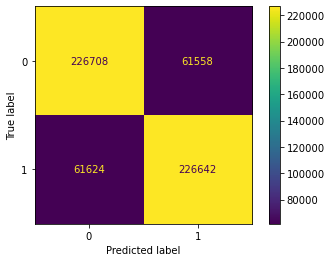

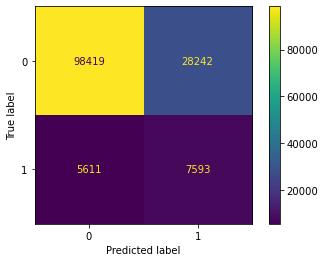

In [108]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb,X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'XGBoost_over')

In [53]:
#Hyperparameter tuning
# Inisialisasi XGBoost classifier
xgb = XGBClassifier()

# Menentukan parameter yang ingin dituning
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8],
    'min_child_weight': [1, 2, 3]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv=3, n_iter=10, scoring='accuracy', n_jobs=-1)

# Fit RandomizedSearchCV pada data training
random_search.fit(X_train_scaled_over, y_train_over)

# Melihat hyperparameter terbaik
print("Best Parameters: ", random_search.best_params_)

# Melihat skor terbaik
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Score:  0.7435961933517653


- Best Parameters:  {'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
- Best Score:  0.7435961933517653

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75    288266
           1       0.76      0.73      0.74    288266

    accuracy                           0.75    576532
   macro avg       0.75      0.75      0.75    576532
weighted avg       0.75      0.75      0.75    576532

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.95      0.75      0.84    126661
           1       0.20      0.61      0.31     13204

    accuracy                           0.74    139865
   macro avg       0.58      0.68      0.57    139865
weighted avg       0.88      0.74      0.79    139865

ROC AUC:  0.7520128892020785


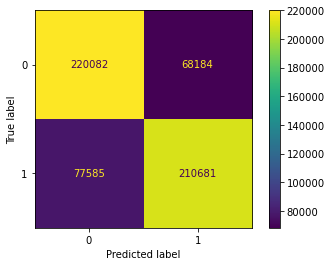

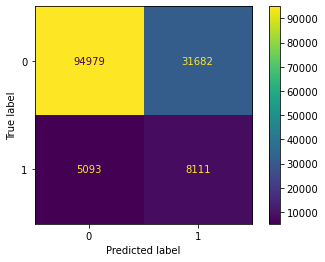

In [67]:
xgb_best = XGBClassifier(n_estimators=200, learning_rate=0.05, min_child_weight=2, max_depth=7, colsample_bytree=0.8)
model_assess(xgb_best,X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'XGBoost_over')

performa xgb sedikit meningkat

                    Lgbm_over 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73    288266
           1       0.73      0.70      0.72    288266

    accuracy                           0.72    576532
   macro avg       0.72      0.72      0.72    576532
weighted avg       0.72      0.72      0.72    576532

                    Lgbm_over 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82    126661
           1       0.20      0.65      0.30     13204

    accuracy                           0.71    139865
   macro avg       0.57      0.68      0.56    139865
weighted avg       0.88      0.71      0.77    139865

ROC AUC:  0.7516692829725861


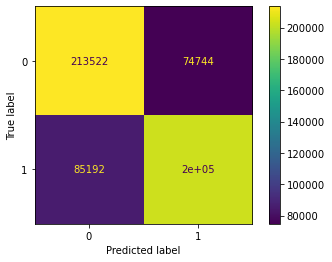

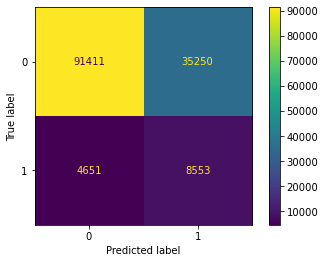

In [109]:
lgbm = lgb.LGBMClassifier()
model_assess(lgbm,X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'Lgbm_over')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lgbm = lgb.LGBMClassifier()

# Menentukan parameter yang ingin dituning
# params = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 127],
#     'min_child_samples': [20, 30],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1]
# }

params = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_fraction': [0.7, 0.8, 0.9, 1.0],
    'bagging_freq': [2, 4, 5, 6, 8],
    'colsample_bytree': [0.6, 0.8, 1],
    'reg_alpha': [0, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.5, 1, 2, 5],
}

# Inisialisasi RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgbm, param_distributions=params, cv=3, n_iter=10, scoring='accuracy', n_jobs=-1)

# Fit RandomizedSearchCV pada data training
random_search_lgb.fit(X_train_scaled_over, y_train_over)

# Melihat hyperparameter terbaik
print("Best Parameters: ", random_search_lgb.best_params_)

# Melihat skor terbaik
print("Best Score: ", random_search_lgb.best_score_)


params = {
    'num_leaves': list(range(8, 92, 4)),
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'bagging_fraction': [0.7, 0.8, 0.9, 1.0],
    'bagging_freq': [2, 4, 5, 6, 8],
    'colsample_bytree': [0.6, 0.8, 1],
    'reg_alpha': [0, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.5, 1, 2, 5],
}
- Best Parameters:  {'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 88, 'min_data_in_leaf': 20, 'max_depth': -1, 'learning_rate': 0.1, 'colsample_bytree': 0.8, 'bagging_freq': 6, 'bagging_fraction': 0.9}
- Best Score:  0.7463575338655039

 Menentukan parameter yang ingin dituning
 params = {
     'n_estimators': [100, 150, 200],
     'learning_rate': [0.01, 0.05, 0.1],
     'max_depth': [3, 5, 7],
     'num_leaves': [31, 127],
     'min_child_samples': [20, 30],
     'subsample': [0.8, 1],
     'colsample_bytree': [0.8, 1]
 }

- Best Parameters:  {'subsample': 0.8, 'num_leaves': 31, 'n_estimators': 150, 'min_child_samples': 30, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1}
- Best Score:  0.7265650510424564

                    Lgbm_over_best 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76    288266
           1       0.76      0.75      0.75    288266

    accuracy                           0.75    576532
   macro avg       0.75      0.75      0.75    576532
weighted avg       0.75      0.75      0.75    576532

                    Lgbm_over_best 
               precision    recall  f1-score   support

           0       0.95      0.75      0.84    126661
           1       0.20      0.62      0.31     13204

    accuracy                           0.74    139865
   macro avg       0.58      0.68      0.57    139865
weighted avg       0.88      0.74      0.79    139865

ROC AUC:  0.7524774008070132


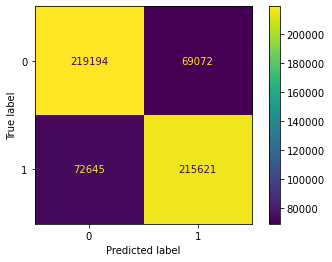

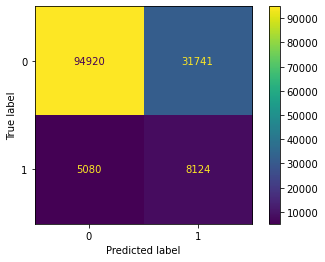

In [56]:
lgbm_best = lgb.LGBMClassifier(reg_lambda=1, reg_alpha=1, subsample=0.8, num_leaves=88, min_data_in_leaf=20, n_estimator=150, max_depth=-1, learning_rate=0.1, colsample_bytree=0.8, bagging_freq=6)
model_assess(lgbm_best,X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'Lgbm_over_best')

                    Lgbm_over_best 
               precision    recall  f1-score   support

           0       0.71      0.74      0.73    288266
           1       0.73      0.70      0.72    288266

    accuracy                           0.72    576532
   macro avg       0.72      0.72      0.72    576532
weighted avg       0.72      0.72      0.72    576532

                    Lgbm_over_best 
               precision    recall  f1-score   support

           0       0.95      0.73      0.83    126661
           1       0.20      0.64      0.30     13204

    accuracy                           0.72    139865
   macro avg       0.57      0.68      0.57    139865
weighted avg       0.88      0.72      0.78    139865

ROC AUC:  0.7531220955393385


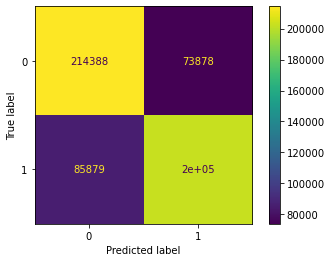

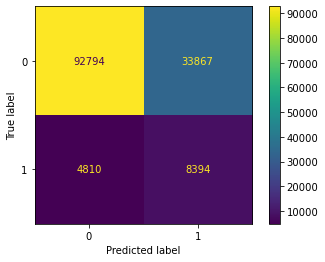

In [51]:
lgbm_best = lgb.LGBMClassifier(subsample=0.8, num_leaves=31, n_estimator=150, min_child_samples=30, max_depth=7, learning_rate=0.1, colsample_bytree=1)
model_assess(lgbm_best,X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'Lgbm_over_best')

## Underover sampling combine

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68    288266
           1       0.68      0.64      0.66    288266

    accuracy                           0.67    576532
   macro avg       0.67      0.67      0.67    576532
weighted avg       0.67      0.67      0.67    576532

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.57      0.71    126661
           1       0.15      0.76      0.26     13204

    accuracy                           0.59    139865
   macro avg       0.56      0.66      0.48    139865
weighted avg       0.88      0.59      0.67    139865

ROC AUC:  0.730497906018106
                    DecisionTree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    288266
           1       1.00      1.00      1.00    288266

    accuracy                       

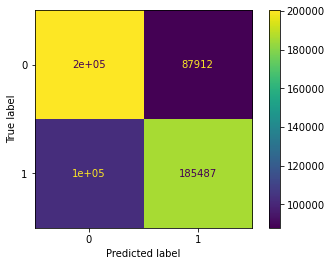

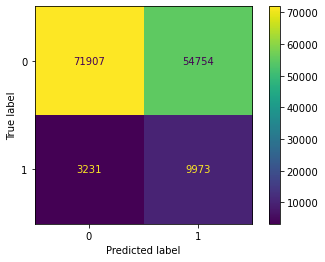

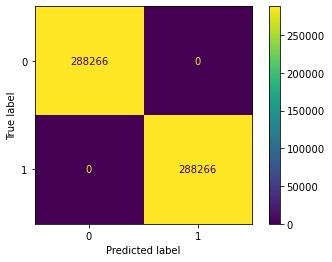

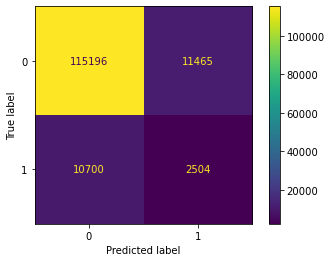

In [93]:
#Logistic Regression
lg = LogisticRegression()
model_assess(lg, X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test, 'Logistic Regression')

In [ ]:
dec_tree = DecisionTreeClassifier()
model_assess(dec_tree, X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test, name='DecisionTree')

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79    288266
           1       0.79      0.79      0.79    288266

    accuracy                           0.79    576532
   macro avg       0.79      0.79      0.79    576532
weighted avg       0.79      0.79      0.79    576532

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.95      0.78      0.85    126661
           1       0.21      0.57      0.31     13204

    accuracy                           0.76    139865
   macro avg       0.58      0.67      0.58    139865
weighted avg       0.88      0.76      0.80    139865

ROC AUC:  0.7427622871189482


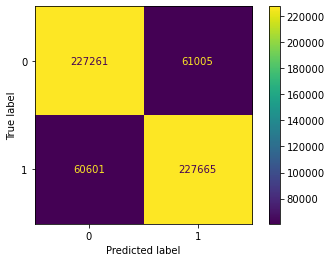

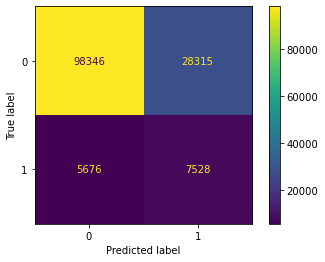

In [94]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test,'XGBoost_over')

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Inisialisasi XGBoost classifier
xgb = XGBClassifier()

# Menentukan parameter yang ingin dituning
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv=3, n_iter=10, scoring='accuracy', n_jobs=-1)

# Fit RandomizedSearchCV pada data training
random_search.fit(X_train_scaled_combined, y_combined_sampling)

# Melihat hyperparameter terbaik
print("Best Parameters: ", random_search.best_params_)

# Melihat skor terbaik
print("Best Score: ", random_search.best_score_)


Best Parameters:  {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2}
Best Score:  0.7186470136769829


- Best Parameters:  {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.2}
- Best Score:  0.7186470136769829

In [151]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.2, max_depth=4)
model_assess(xgb,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test,'XGBoost_over')

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79    288266
           1       0.79      0.79      0.79    288266

    accuracy                           0.79    576532
   macro avg       0.79      0.79      0.79    576532
weighted avg       0.79      0.79      0.79    576532

                    XGBoost_over 
               precision    recall  f1-score   support

           0       0.94      0.80      0.86    126661
           1       0.22      0.54      0.31     13204

    accuracy                           0.77    139865
   macro avg       0.58      0.67      0.59    139865
weighted avg       0.88      0.77      0.81    139865

ROC AUC:  0.7392816836965226


In [149]:
best_params_xgb = random_search.best_params_
xgb_best = lgb.LGBMClassifier(**best_params_xgb)
model_assess(xgb_best,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test,'xgb_overunder_best')

                    xgb_overunder_best 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73    288266
           1       0.73      0.71      0.72    288266

    accuracy                           0.72    576532
   macro avg       0.72      0.72      0.72    576532
weighted avg       0.72      0.72      0.72    576532

                    xgb_overunder_best 
               precision    recall  f1-score   support

           0       0.95      0.73      0.83    126661
           1       0.20      0.63      0.30     13204

    accuracy                           0.72    139865
   macro avg       0.57      0.68      0.56    139865
weighted avg       0.88      0.72      0.78    139865

ROC AUC:  0.7469261001466556


                    lgbm_overunder 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73    288266
           1       0.73      0.71      0.72    288266

    accuracy                           0.72    576532
   macro avg       0.72      0.72      0.72    576532
weighted avg       0.72      0.72      0.72    576532

                    lgbm_overunder 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82    126661
           1       0.19      0.64      0.30     13204

    accuracy                           0.71    139865
   macro avg       0.57      0.68      0.56    139865
weighted avg       0.88      0.71      0.77    139865

ROC AUC:  0.7510955280519043


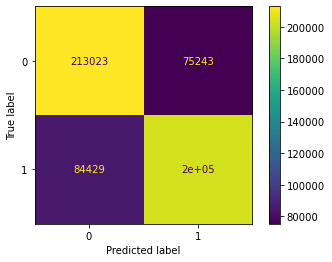

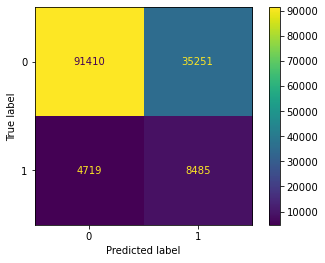

In [95]:
lgbm = lgb.LGBMClassifier()
model_assess(lgbm,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test,'lgbm_overunder')

In [144]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Inisiasi model LightGBM
lgbm = lgb.LGBMClassifier()

# Tentukan parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'num_leaves': [31, 60],
    'min_data_in_leaf': [20, 50],
    'bagging_fraction': [0.7, 0.8]
}

# Inisiasi GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
print(grid_search)

# Lakukan fit pada data training
grid_search.fit(X_train_scaled_combined, y_combined_sampling)

# Tampilkan hyperparameter terbaik
print("Best Hyperparameters: ", grid_search.best_params_)
#Best Hyperparameters:  {'bagging_fraction': 0.7, 'learning_rate': 0.2, 'max_depth': 20, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 60}

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.7, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 20, 30],
                         'min_data_in_leaf': [20, 50],
                         'n_estimators': [100, 200], 'num_leaves': [31, 60]},
             verbose=2)
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
Best Hyperparameters:  {'bagging_fraction': 0.7, 'learning_rate': 0.2, 'max_depth': 20, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 60}


- Best Hyperparameters:  {'bagging_fraction': 0.7, 'learning_rate': 0.2, 'max_depth': 20, 'min_data_in_leaf': 50, 'n_estimators': 200, 'num_leaves': 60}

In [147]:
# Train model dengan hyperparameter terbaik
best_params = grid_search.best_params_
lgbm_best = lgb.LGBMClassifier(**best_params)
model_assess(lgbm_best,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test,'lgbm_overunder_best')

                    lgbm_overunder_best 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81    288266
           1       0.80      0.82      0.81    288266

    accuracy                           0.81    576532
   macro avg       0.81      0.81      0.81    576532
weighted avg       0.81      0.81      0.81    576532

                    lgbm_overunder_best 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85    126661
           1       0.21      0.58      0.31     13204

    accuracy                           0.75    139865
   macro avg       0.58      0.68      0.58    139865
weighted avg       0.88      0.75      0.80    139865

ROC AUC:  0.7441108966351397


In [77]:
rf = RandomForestClassifier()
model_assess(rf,X_train_scaled_combined, y_combined_sampling, X_test_scaled_combined, y_test ,'RandomForest')

                    RandomForest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    337711
           1       1.00      1.00      1.00    337711

    accuracy                           1.00    675422
   macro avg       1.00      1.00      1.00    675422
weighted avg       1.00      1.00      1.00    675422

                    RandomForest 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     84501
           1       0.42      0.07      0.12      8755

    accuracy                           0.90     93256
   macro avg       0.66      0.53      0.53     93256
weighted avg       0.86      0.90      0.87     93256



In [ ]:
lgbm = lgb.LGBMClassifier()
model_assess(lgbm, X_train_scaled_over, y_train_over, X_test_scaled_over, y_test,'XGBoost_over')

## Feature Importances

select modelling with good evaluation and score. then running feature importance


Fitur penting atau feature importance dalam suatu model pembelajaran mesin memberikan gambaran tentang fitur mana yang paling berkontribusi terhadap prediksi model tersebut. Nilai ini bisa memberikan wawasan yang berguna tentang data dan model Anda. 

<AxesSubplot:>

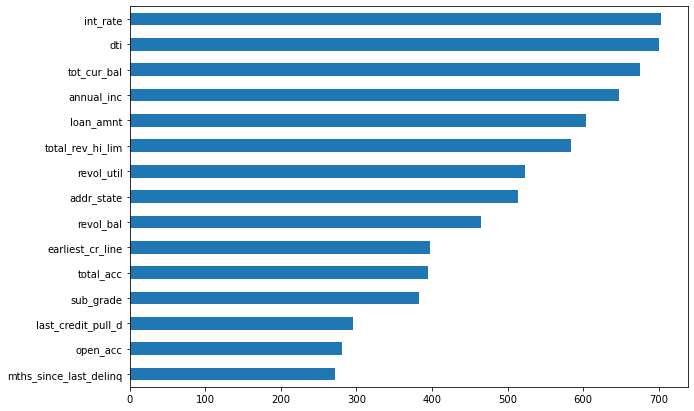

In [63]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(lgbm_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
# feature_importances.plot.bar();
feature = feature_importances.head(15).sort_values(ascending=True)
feature.plot(kind='barh', figsize=(10, 7))
# clf.feature_importances_

<AxesSubplot:>

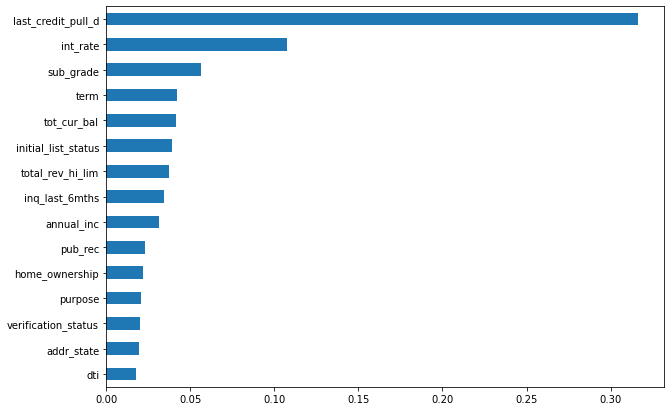

In [68]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(xgb_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
# feature_importances.plot.bar();
feature = feature_importances.head(15).sort_values(ascending=True)
feature.plot(kind='barh', figsize=(10, 7))